In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from Data_for_bp import data_gather_from_files,run_strategy_optimised,run_strategy_eval,get_tick_data
import seaborn as sns
import time
import scipy

In [2]:
import calendar

# The function to gather data for each month and year
def gather_data_for_month(year, month):
    start_day = '1'
    end_day = calendar.monthrange(year, month)[1]  # Get the last day of the month
    start_date = f"{start_day} {calendar.month_name[month]} {year}"
    end_date = f"{end_day} {calendar.month_name[month]} {year}"
    return data_gather_from_files(start_date, end_date)['EURUSD.mid']

# Gather data for each month and store in a dictionary
months_data = {}
for month in range(1, 13):  # 1 to 12 for January to December
    year = 2021  
    months_data[calendar.month_name[month]] = gather_data_for_month(year, month)

In [3]:
Year_data = data_gather_from_files('1 jan 2021','31 dec 2021')['EURUSD.mid']

In [4]:
run_strategy_optimised(Year_data,0.001,484315)

(-129796.42, -51312.7934, 5976447.1, 9432.035)

# Experiment

In [32]:
Past_data = data_gather_from_files('1 dec 2020','28 feb 2021')['EURUSD.mid']
Past_data2 = data_gather_from_files('1 mar 2021','30 apr 2021')['EURUSD.mid']
Past_data3 = data_gather_from_files('1 jul 2021','31 oct 2021')['EURUSD.mid']

In [33]:
Now_data = data_gather_from_files('1 dec 2021','28 feb 2022')['EURUSD.mid']
Now_data2 = data_gather_from_files('1 mar 2022','30 apr 2022')['EURUSD.mid']
Now_data3 = data_gather_from_files('1 jul 2022','31 oct 2022')['EURUSD.mid']

In [44]:
Last_data = data_gather_from_files('1 dec 2019','28 feb 2020')['EURUSD.mid']
Last_data2 = data_gather_from_files('1 mar 2020','30 apr 2020')['EURUSD.mid']
Last_data3 = data_gather_from_files('1 jul 2020','31 oct 2020')['EURUSD.mid']

In [20]:
# intuitive G and n neighbor solution
def neighbor_solution(G, n):
    delta_G_step = np.random.choice([-0.002,-0.001, 0, 0.001, 0.002])  # G can decrease, stay the same, or increase
    delta_n = np.random.randint(-100, 101) * 10000  # Generates a number in the range of -100 to 100 and multiplies it by 10,000
    new_G = np.clip(G + delta_G_step, 0.001, 0.01)  # Ensure G stays within the [0.001, 0.01] range
    new_n = np.clip(n + delta_n, 100000, 5000000)  # Ensure n stays within the [100000, 5000000] range
    return new_G, new_n

In [21]:
time1 = time.time()
best_G, best_n, best_value = simulated_annealing(Past_data, initial_temperature, cooling_rate)
time2 = time.time()
print(f"Optimal G: {best_G}")
print(f"Optimal n: {best_n}")
print(f"Optimal net profit: {best_value}")
print(f"Computing time:{time2-time1}")

Optimal G: 0.004
Optimal n: 900000
Optimal net profit: 125704.2857
Computing time:133.3689250946045


In [25]:
run_strategy_optimised(Past_data,0.004,900000)

(-79200.0, -73928.5714, 9979200.0, 125704.2857)

In [26]:
run_strategy_optimised(Now_data,0.004,900000)

(-7200.0, -54000.0, 6004800.000000001, 122040.0)

In [45]:
run_strategy_optimised(Last_data,0.004,900000)

(-21600.0, -36000.0, 5040000.000000001, 64800.0)

In [34]:
time1 = time.time()
best_G, best_n, best_value = simulated_annealing(Past_data2, initial_temperature, cooling_rate)
time2 = time.time()
print(f"Optimal G: {best_G}")
print(f"Optimal n: {best_n}")
print(f"Optimal net profit: {best_value}")
print(f"Computing time:{time2-time1}")

Optimal G: 0.007
Optimal n: 2120000
Optimal net profit: 118720.0
Computing time:66.4589593410492


In [35]:
run_strategy_optimised(Past_data2,best_G,best_n)

(-29680.0, -77910.0, 9972480.0, 118720.0)

In [54]:
run_strategy_optimised(Last_data2,0.007,2120000)

(-296800.0, -296800.0, 17036320.0, 421244.0004)

In [56]:
run_strategy_optimised(Year_data,0.007,2120000)

(-786520.0, -955696.0, 24337599.999999996, -160727.2651)

In [36]:
run_strategy_optimised(Now_data2,best_G,best_n)

(-608440.0, -658574.0741, 22408400.0, -883.3334)

In [37]:
time1 = time.time()
best_G, best_n, best_value = simulated_annealing(Past_data3, initial_temperature, cooling_rate)
time2 = time.time()
print(f"Optimal G: {best_G}")
print(f"Optimal n: {best_n}")
print(f"Optimal net profit: {best_value}")
print(f"Computing time:{time2-time1}")

Optimal G: 0.006
Optimal n: 1720000
Optimal net profit: 86430.0
Computing time:105.15042328834534


In [38]:
run_strategy_optimised(Past_data3,best_G,best_n)

(0, -61920.0, 9939880.0, 86430.0)

In [39]:
run_strategy_optimised(Now_data3,best_G,best_n)

(-598560.0, -599304.8591, 16924800.0, 49558.5675)

In [51]:
run_strategy_optimised(Last_data3,0.006,1720000)

(-505680.0, -428280.0, 20640000.0, -40157.2303)

In [41]:
run_strategy_optimised(Year_data,best_G,best_n)

(-743040.0, -807990.855, 20020800.0, -265032.9168)

# SA

In [15]:
initial_temperature = 100
cooling_rate = 0.99

In [16]:
def objective_function(G, n, tick_data):
    max_loss, U_PNL, max_position, R_PNL = run_strategy_optimised(tick_data, G, n)
    return R_PNL if (max_position <= 10e6 and U_PNL >= -150e3 and max_loss >= -500e3) else float('-inf')

def simulated_annealing(tick_data, initial_temperature, cooling_rate):
       
    #initial guess
    current_G = 0.005
    current_n = 2000000
    current_value = objective_function(current_G, current_n, tick_data)
    best_G, best_n, best_value = current_G, current_n, current_value

    temperature = initial_temperature
    no_improve_count = 0

    while temperature > 0.01:
        new_G, new_n = neighbor_solution(current_G, current_n)
        new_value = objective_function(new_G, new_n, tick_data)

        # If the new solution is better or with certain probability based on the difference in objective value and temperature
        if new_value > current_value or np.random.rand() < np.exp((new_value - current_value) / temperature):
            current_G, current_n, current_value = new_G, new_n, new_value

            # Update the best solution if the current one is better
            if current_value > best_value:
                best_G, best_n, best_value = current_G, current_n, current_value

        if new_value > best_value:
            best_G, best_n, best_value = current_G, current_n, current_value
            no_improve_count = 0  # reset the count when a better solution is found
        else:
            no_improve_count += 1
        
        if no_improve_count >= 1000:   
            break  # exit the loop if no improvement is seen for a specified number of iterations
            
        temperature *= cooling_rate

    return best_G, best_n, best_value

## n is vary

Month: January
Optimal G: 0.001
Optimal n: 810354
Optimal net profit: 112751.8893
Computing time:76.29308557510376
maximum loss: -20258.85
min unrealized PNL: -52741.0588
maximum position: 9999768.36
Realized profit: 112751.8893



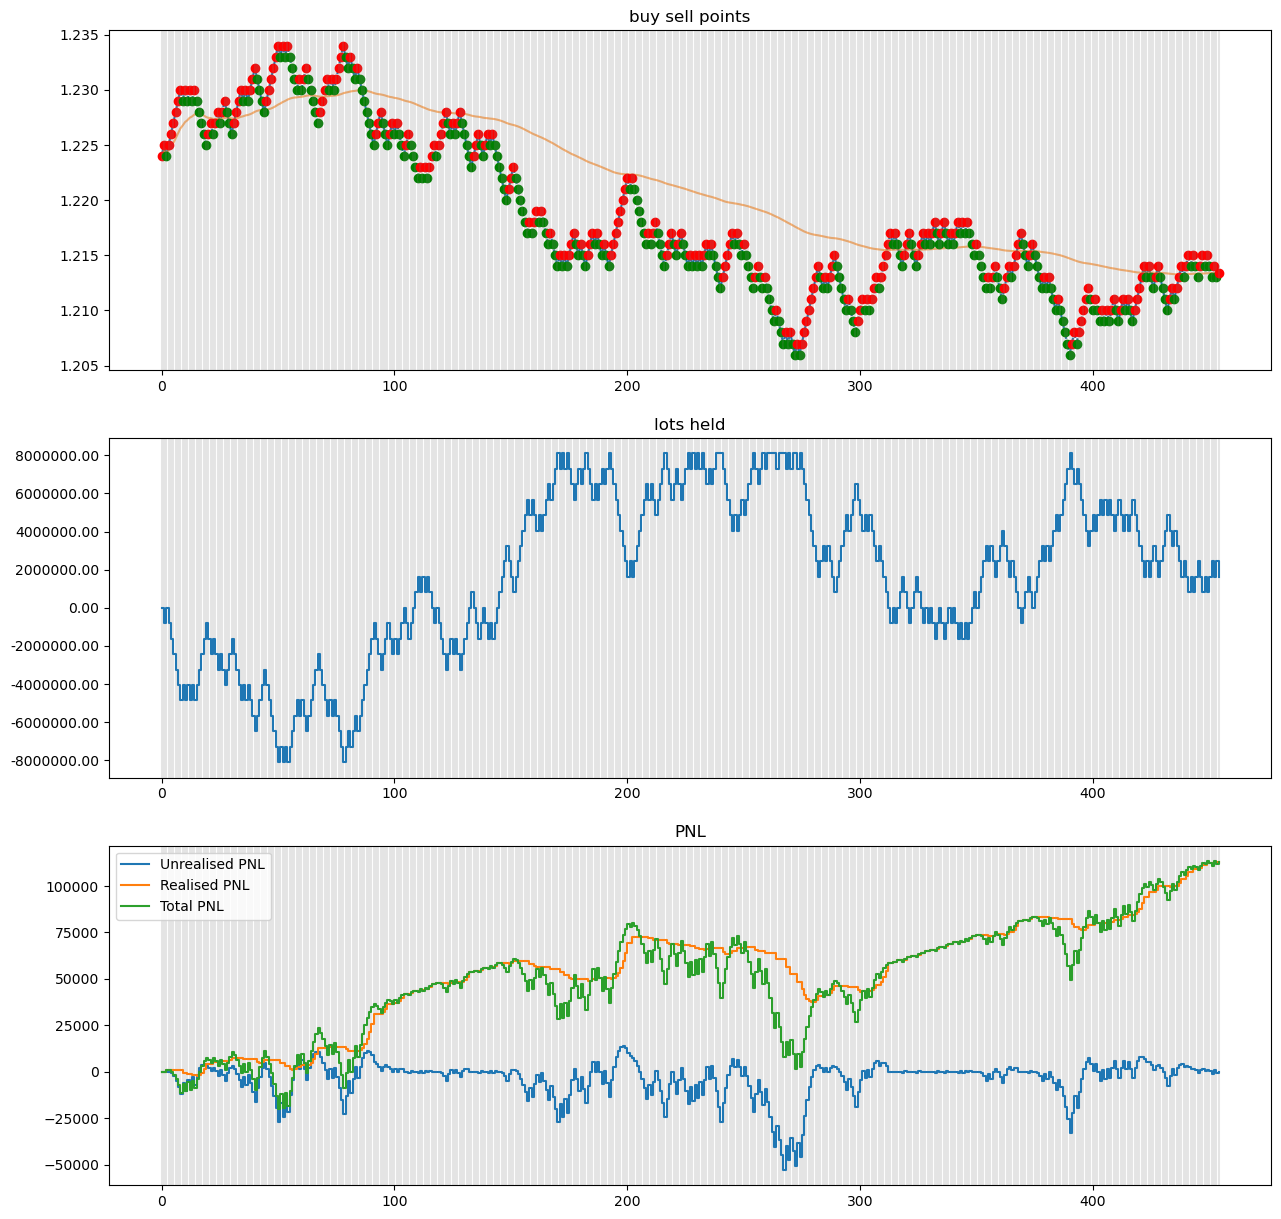

Month: February
Optimal G: 0.002
Optimal n: 927129
Optimal net profit: 74170.3198
Computing time:50.07944178581238
maximum loss: -61190.514
min unrealized PNL: -56323.0868
maximum position: 9979616.556
Realized profit: 74170.3198



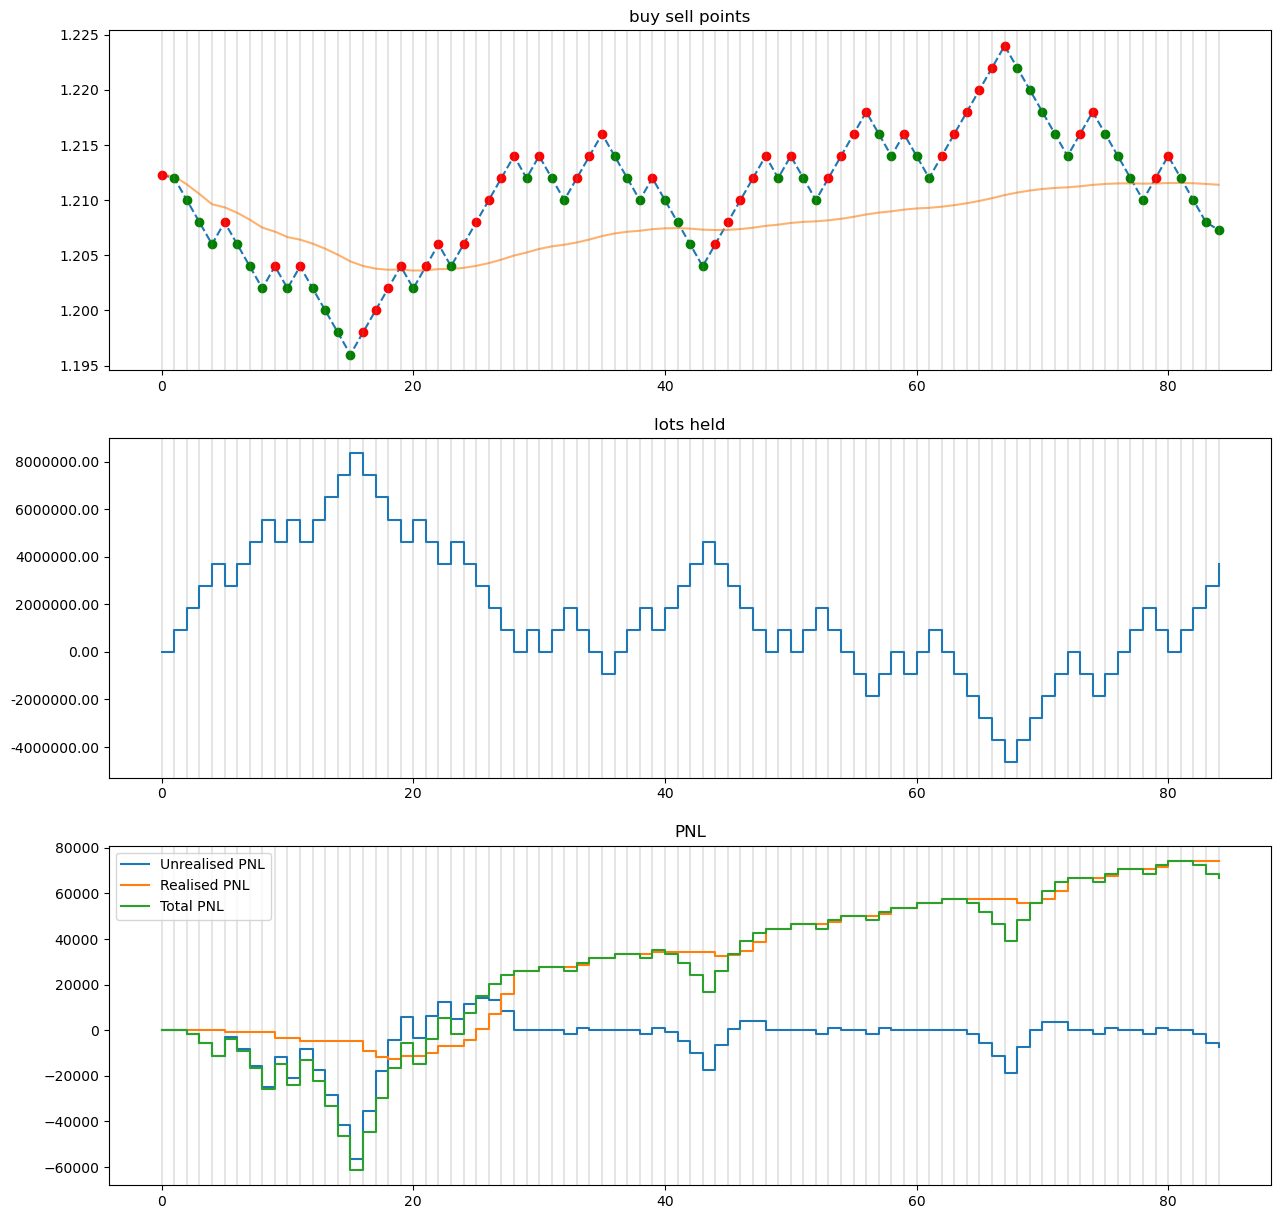

Month: March
Optimal G: 0.007
Optimal n: 1000028
Optimal net profit: 22750.637
Computing time:50.32639956474304
maximum loss: -28800.8064
min unrealized PNL: -51551.4434
maximum position: 5861664.1219999995
Realized profit: 22750.637



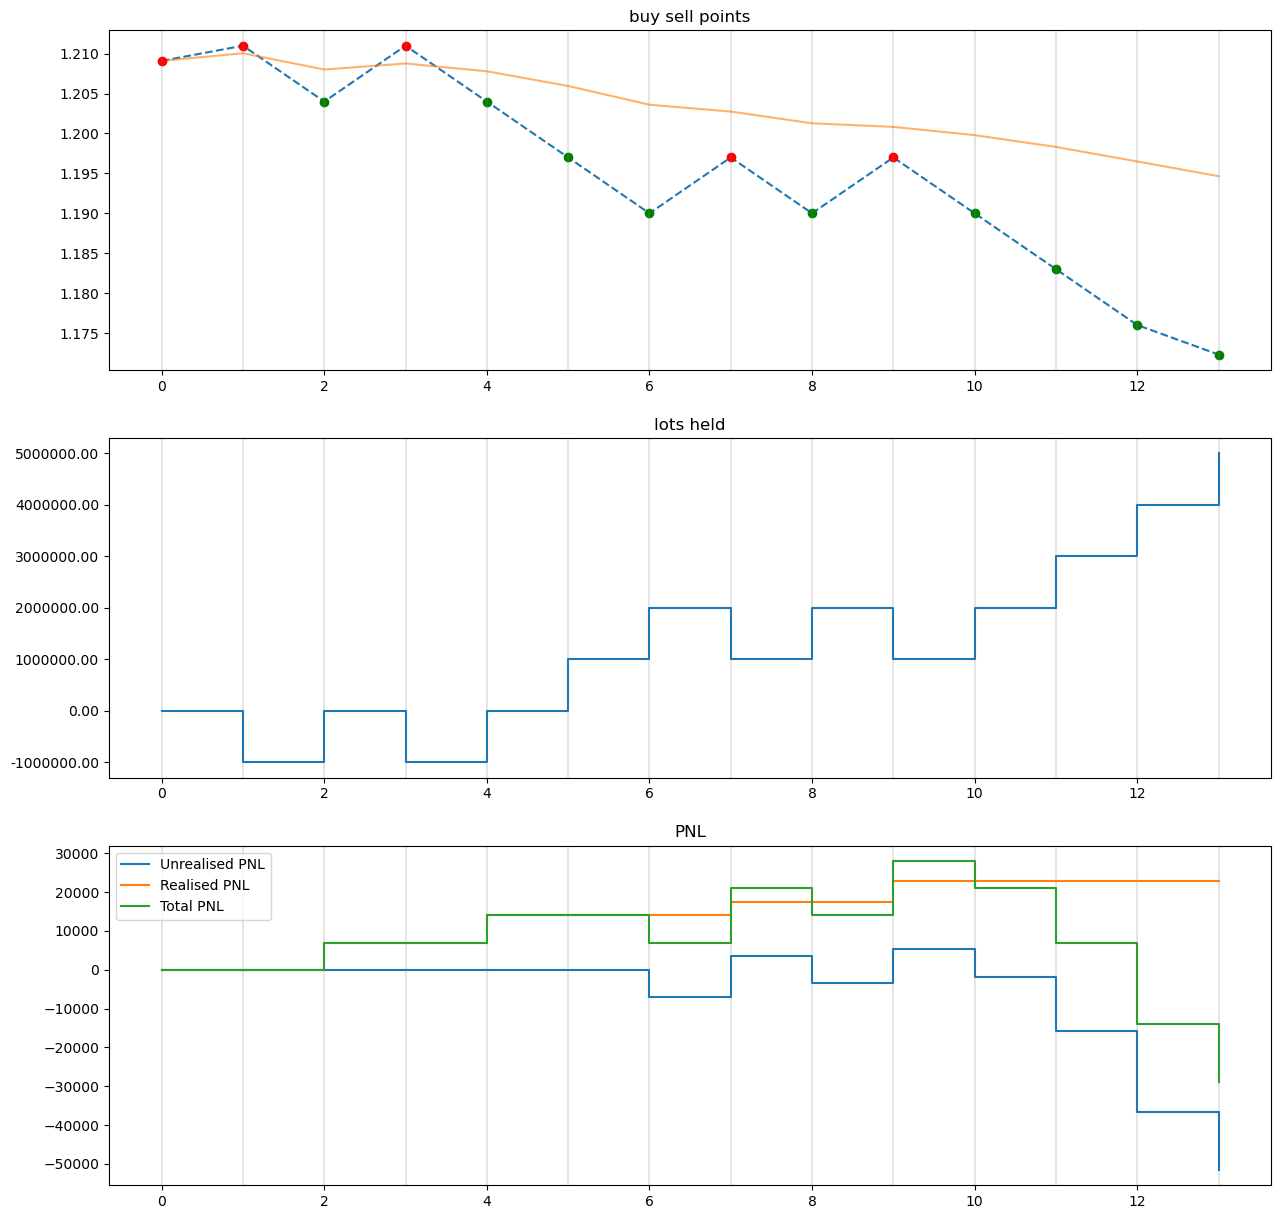

Month: April
Optimal G: 0.01
Optimal n: 1954981
Optimal net profit: 19549.81
Computing time:29.996402740478516
maximum loss: -53761.9775
min unrealized PNL: -73311.7875
maximum position: 9481657.85
Realized profit: 19549.81



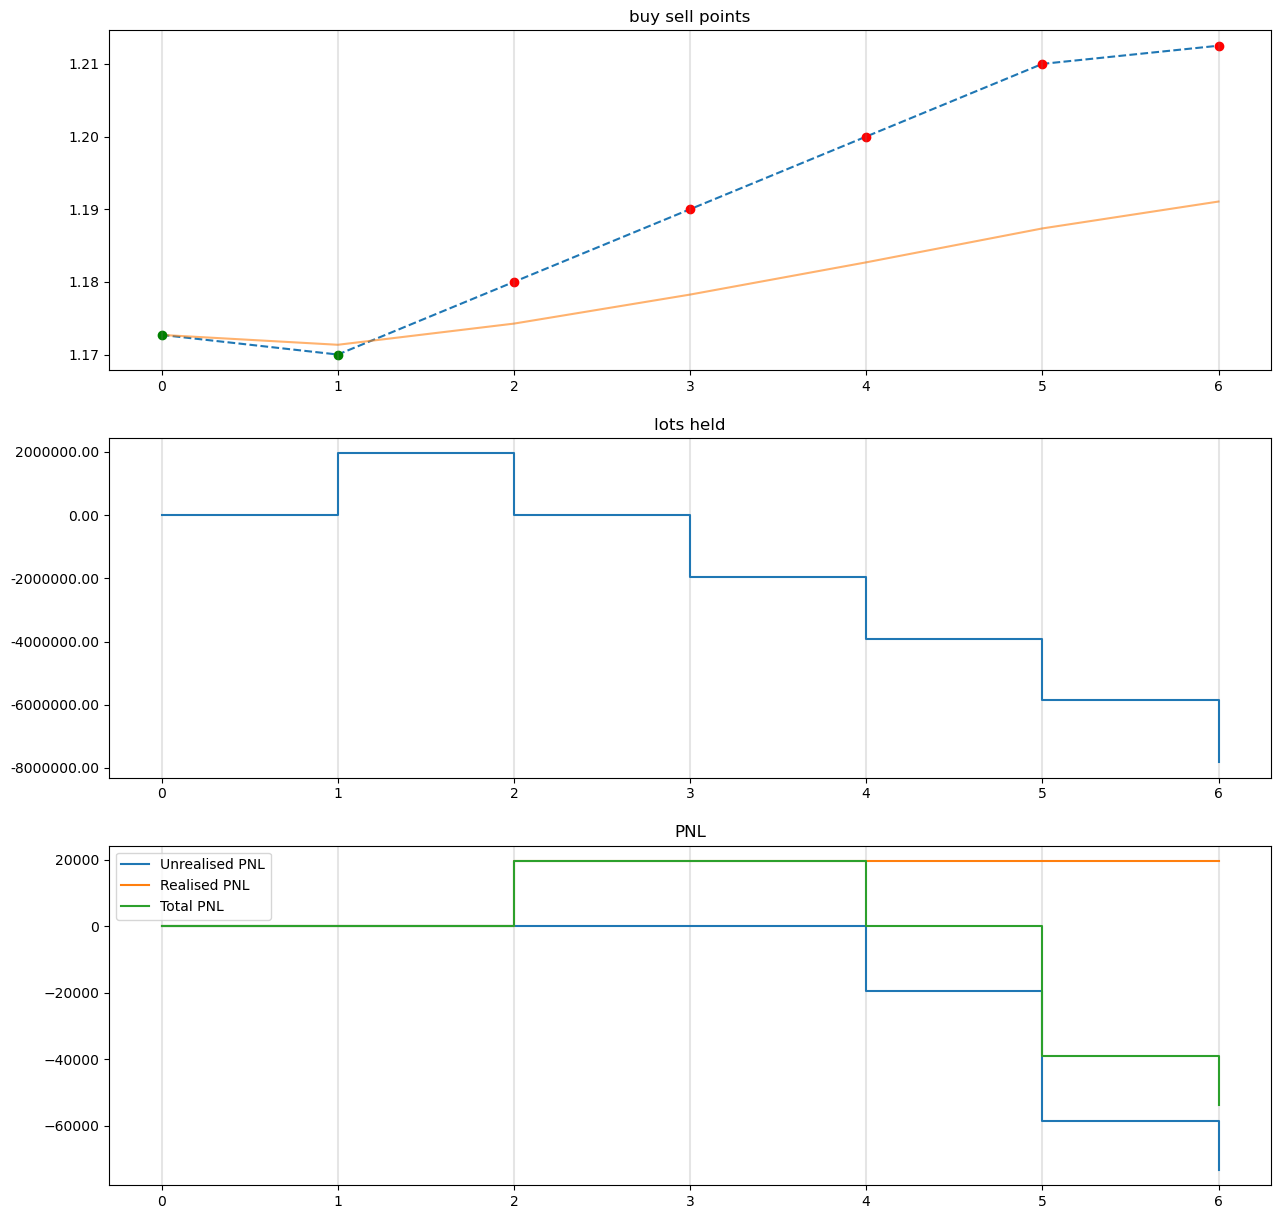

Month: May
Optimal G: 0.001
Optimal n: 815605
Optimal net profit: 36172.0819
Computing time:57.90863251686096
maximum loss: -34255.41
min unrealized PNL: -60768.636
maximum position: 9999317.3
Realized profit: 36172.0819



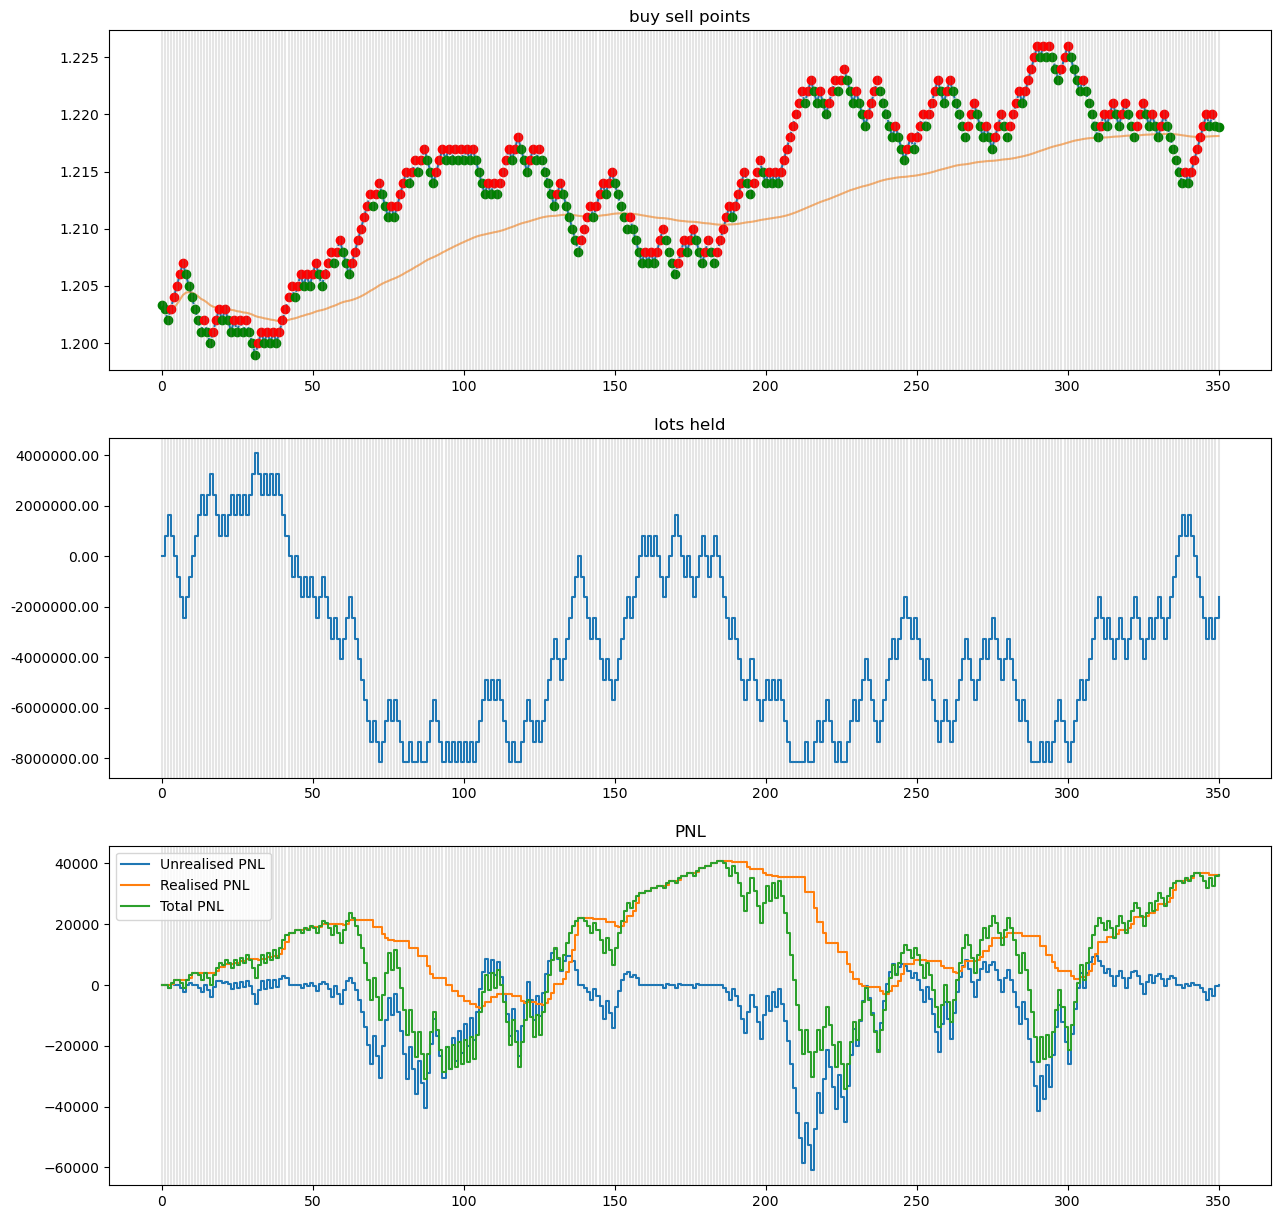

Month: June
Optimal G: 0.007
Optimal n: 1055635
Optimal net profit: 11084.1675
Computing time:34.76597571372986
maximum loss: -29557.78
min unrealized PNL: -44336.67
maximum position: 5024822.6
Realized profit: 11084.1675



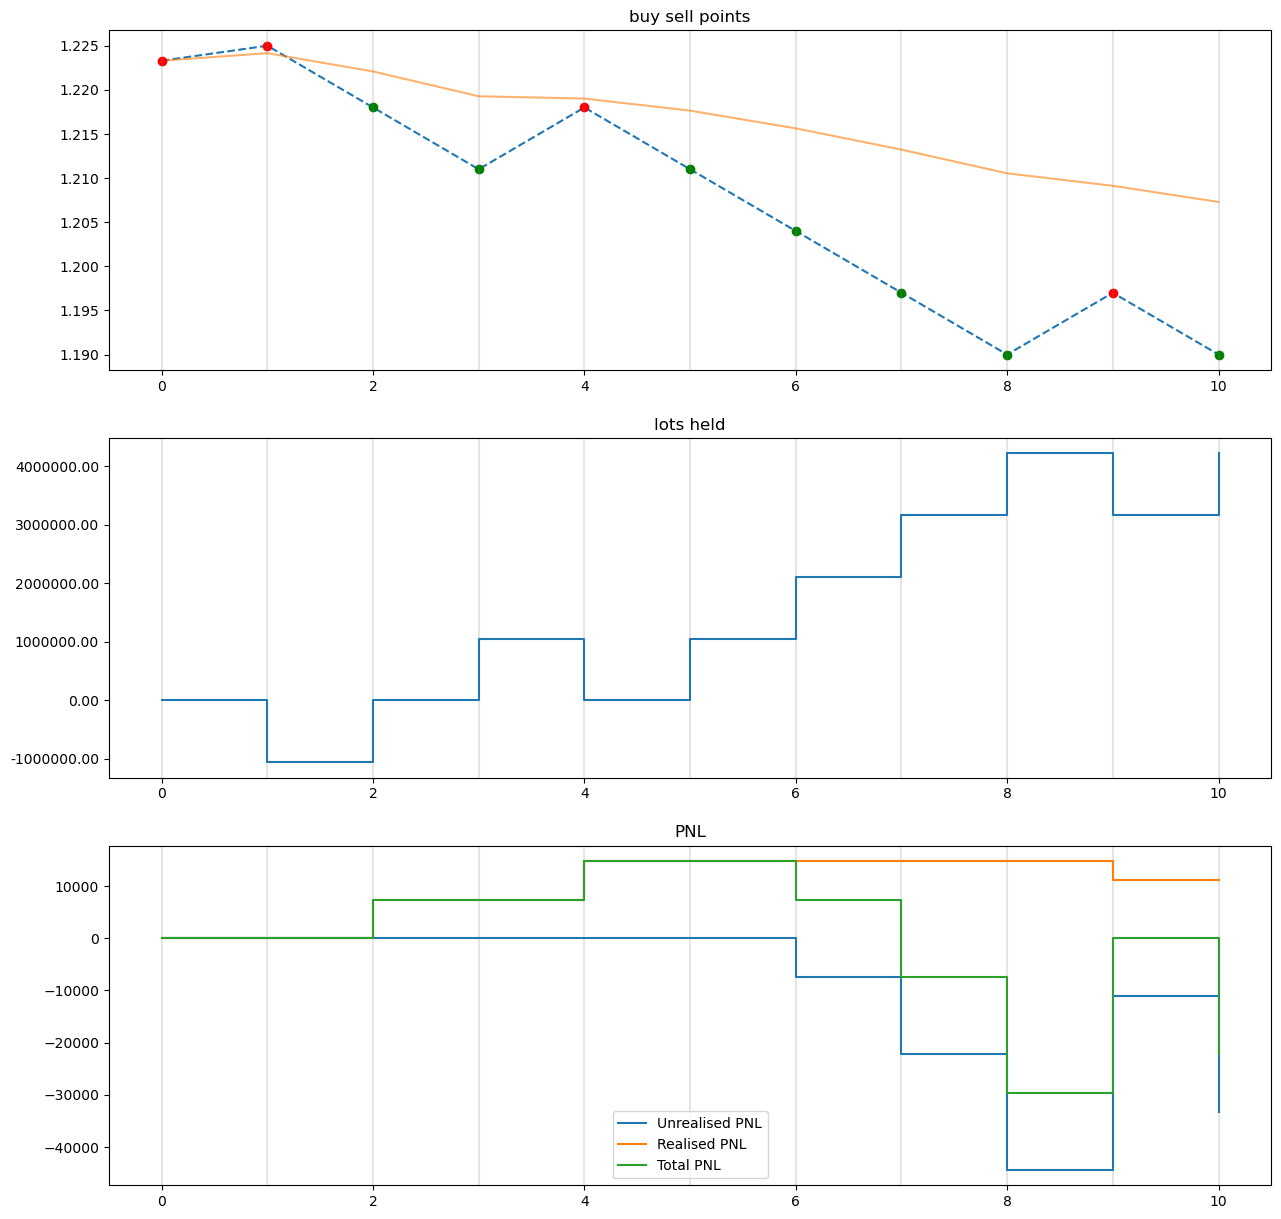

Month: July
Optimal G: 0.001
Optimal n: 944811
Optimal net profit: 146615.7703
Computing time:58.66221642494202
maximum loss: 0
min unrealized PNL: -24652.6331
maximum position: 9999879.624
Realized profit: 146615.7703



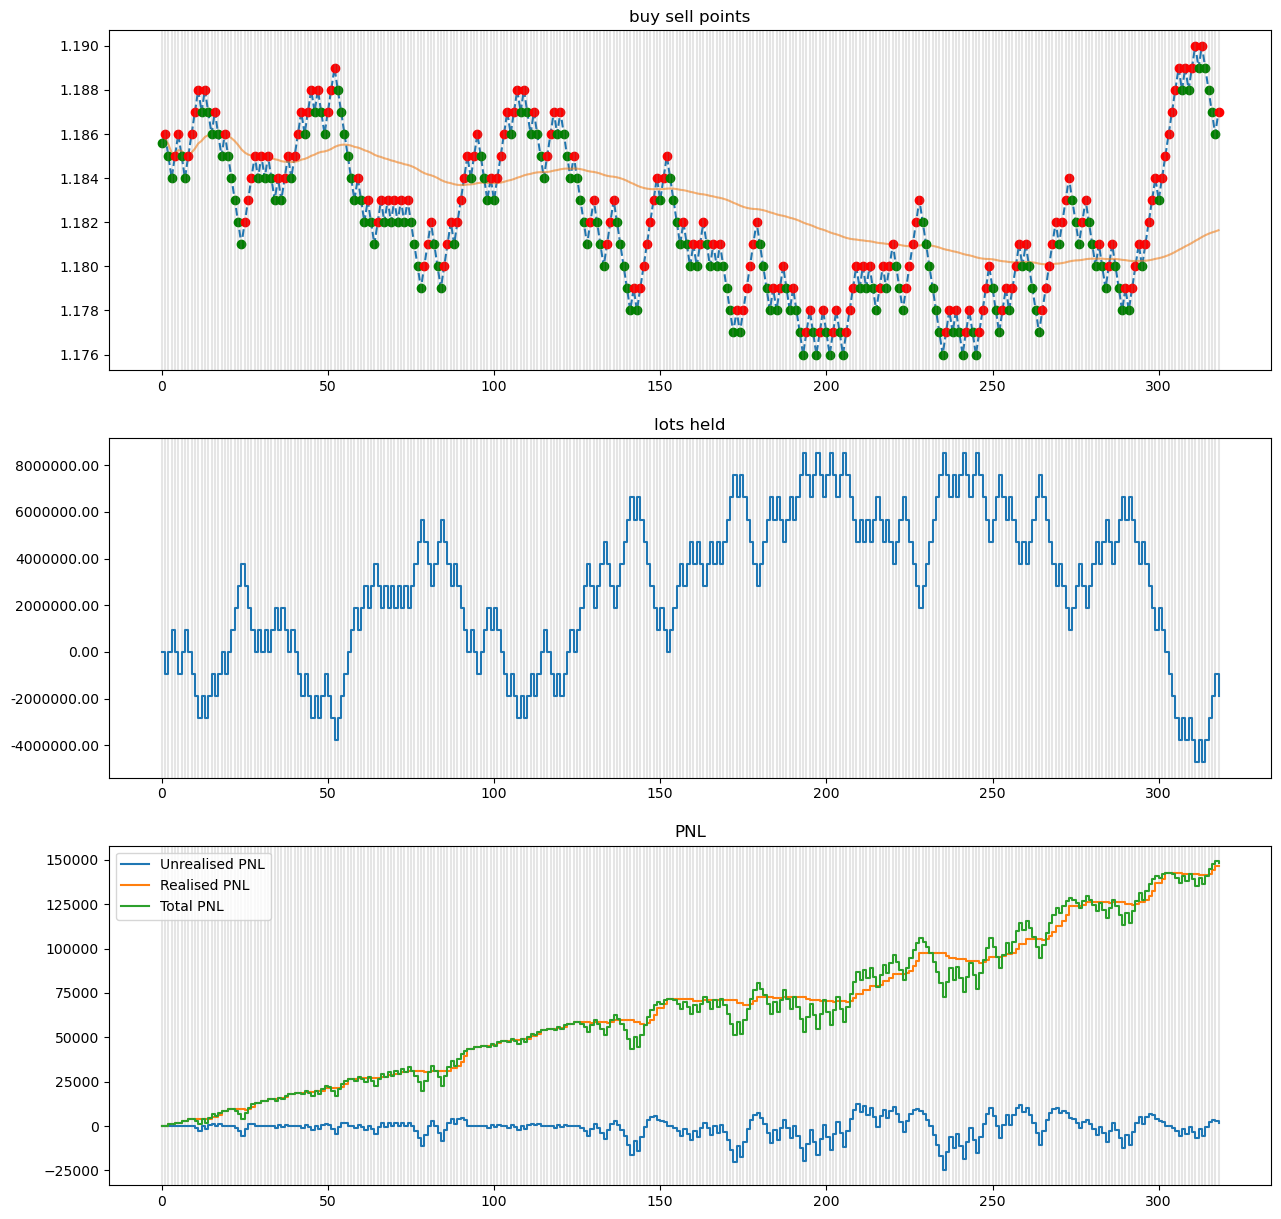

Month: August
Optimal G: 0.003
Optimal n: 1034529
Optimal net profit: 24582.9954
Computing time:28.994742393493652
maximum loss: -31035.87
min unrealized PNL: -35380.8918
maximum position: 7243772.058
Realized profit: 24582.9954



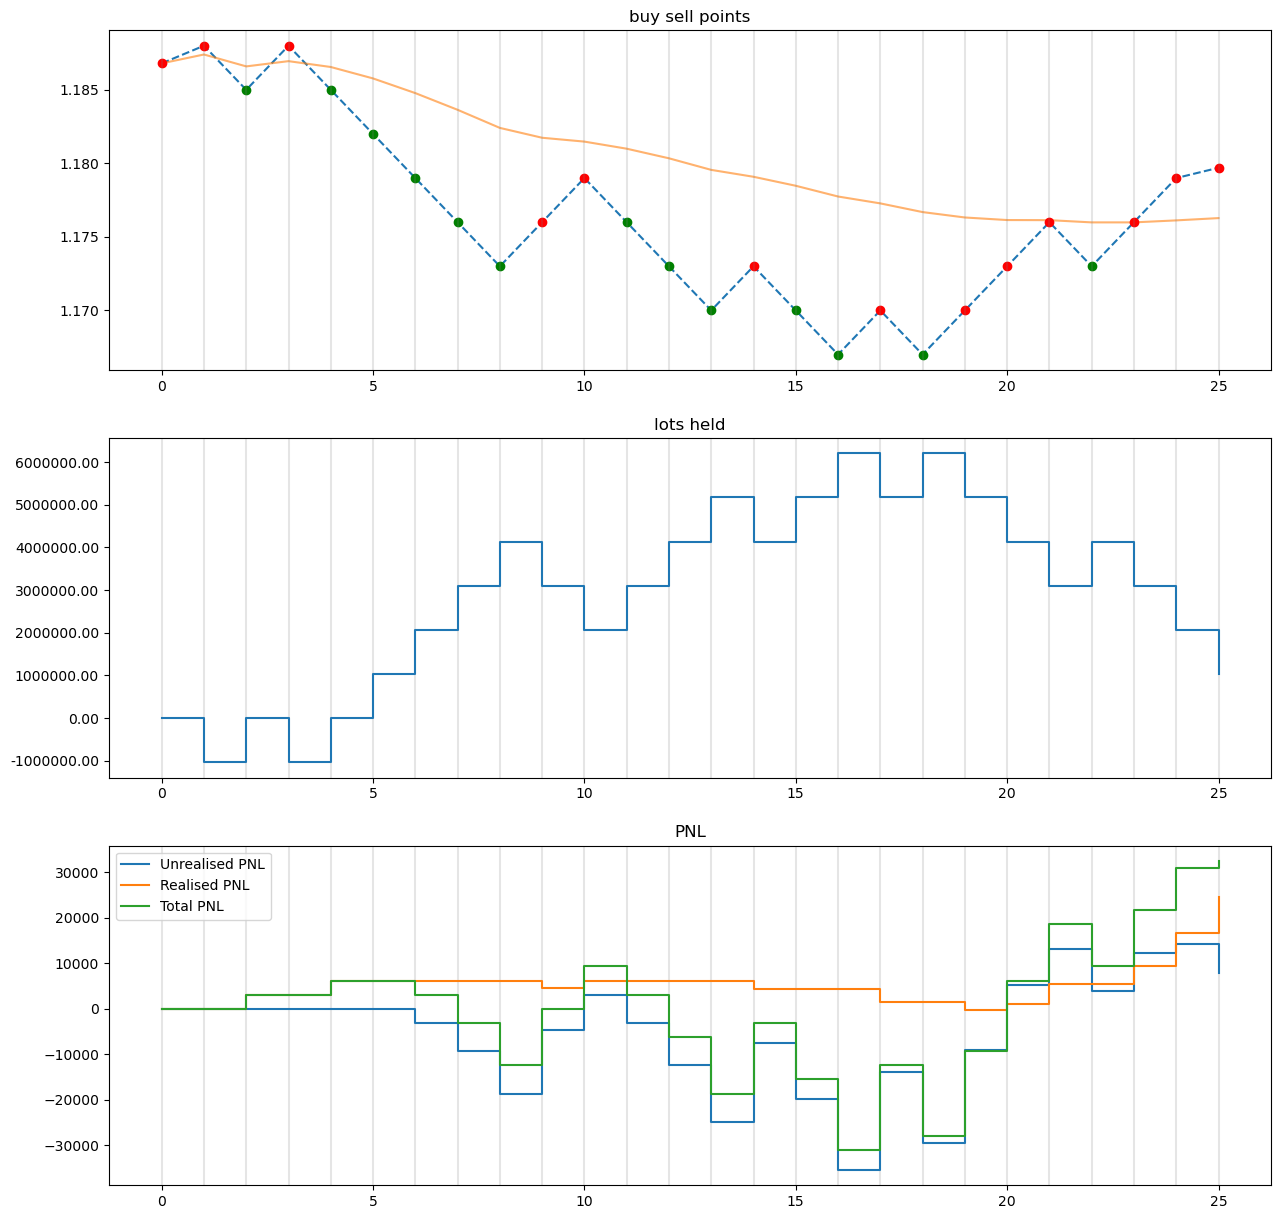

Month: September
Optimal G: 0.002
Optimal n: 861948
Optimal net profit: 22388.8045
Computing time:42.68427538871765
maximum loss: -36201.816
min unrealized PNL: -64909.1457
maximum position: 9998596.799999999
Realized profit: 22388.8045



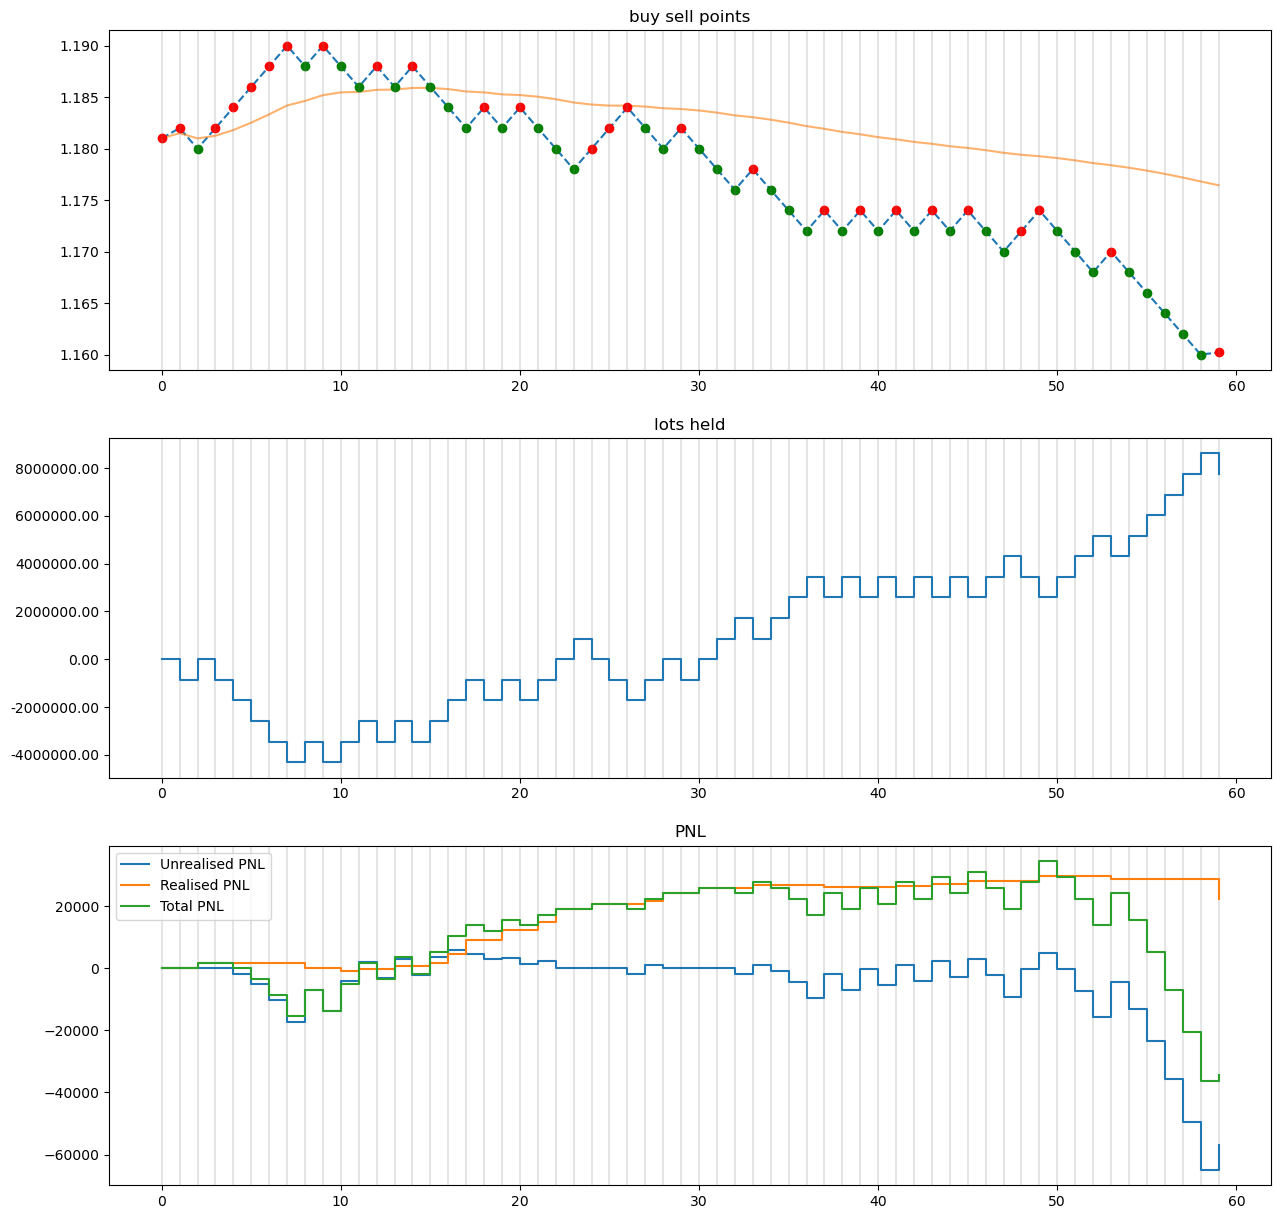

Month: October
Optimal G: 0.001
Optimal n: 855402
Optimal net profit: 89710.2841
Computing time:50.72419810295105
maximum loss: -7698.618
min unrealized PNL: -39343.3695
maximum position: 9999649.38
Realized profit: 89710.2841



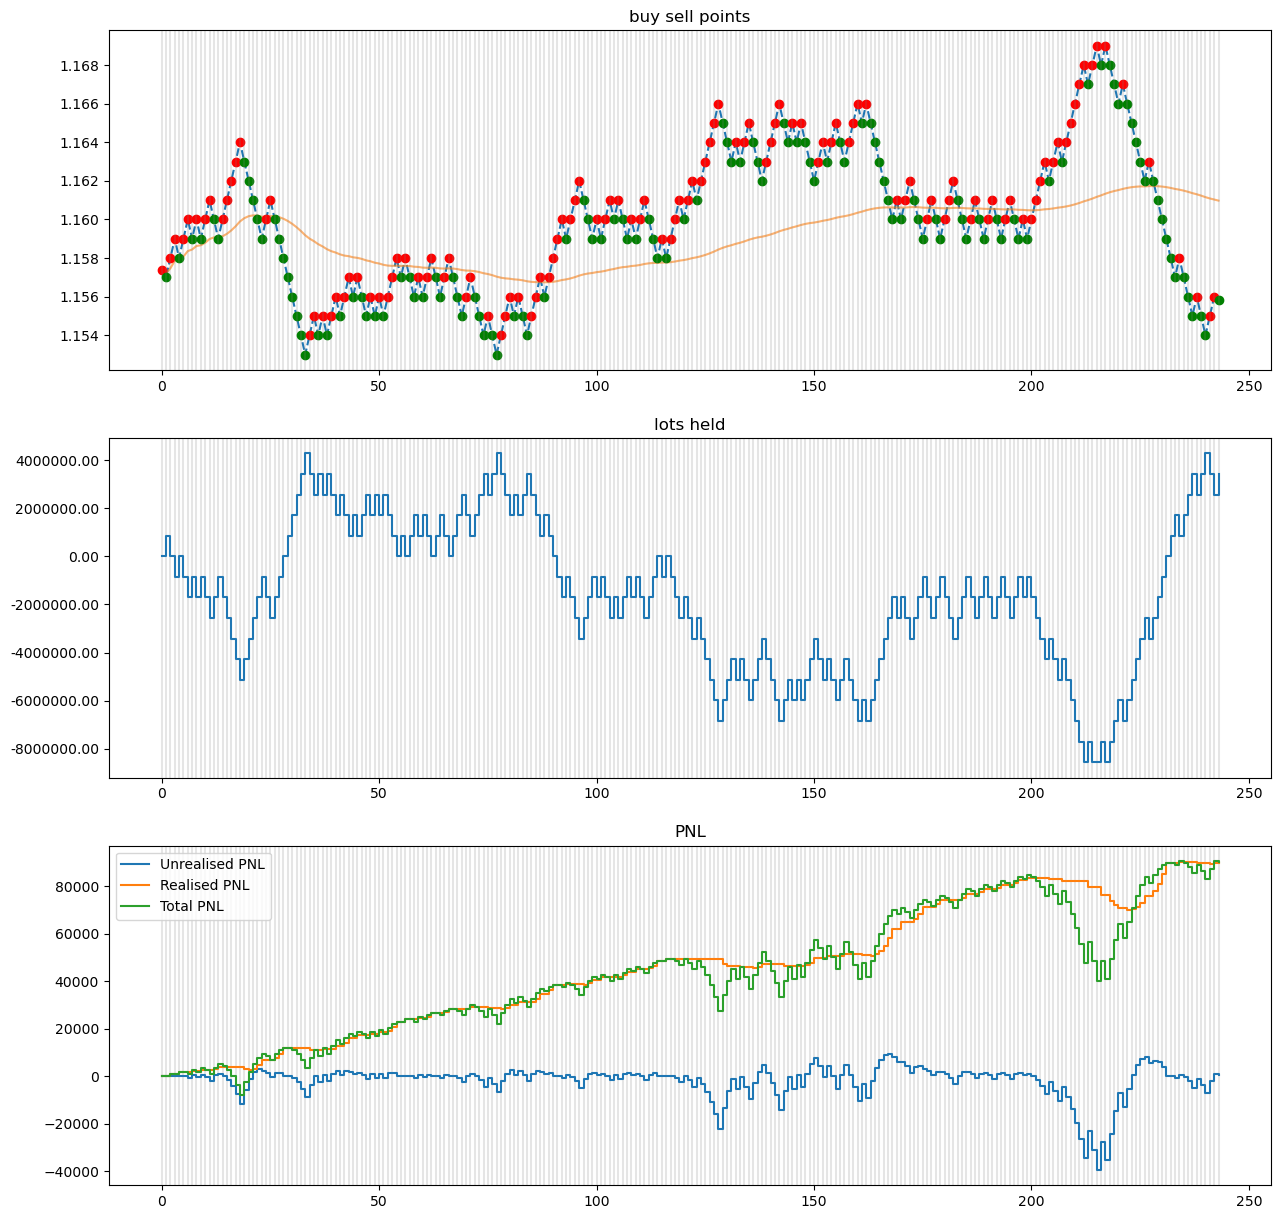

Month: November
Optimal G: 0.01
Optimal n: 1794130
Optimal net profit: 17941.3
Computing time:43.62434196472168
maximum loss: -35882.6
min unrealized PNL: -53823.9
maximum position: 6078333.027
Realized profit: 17941.3



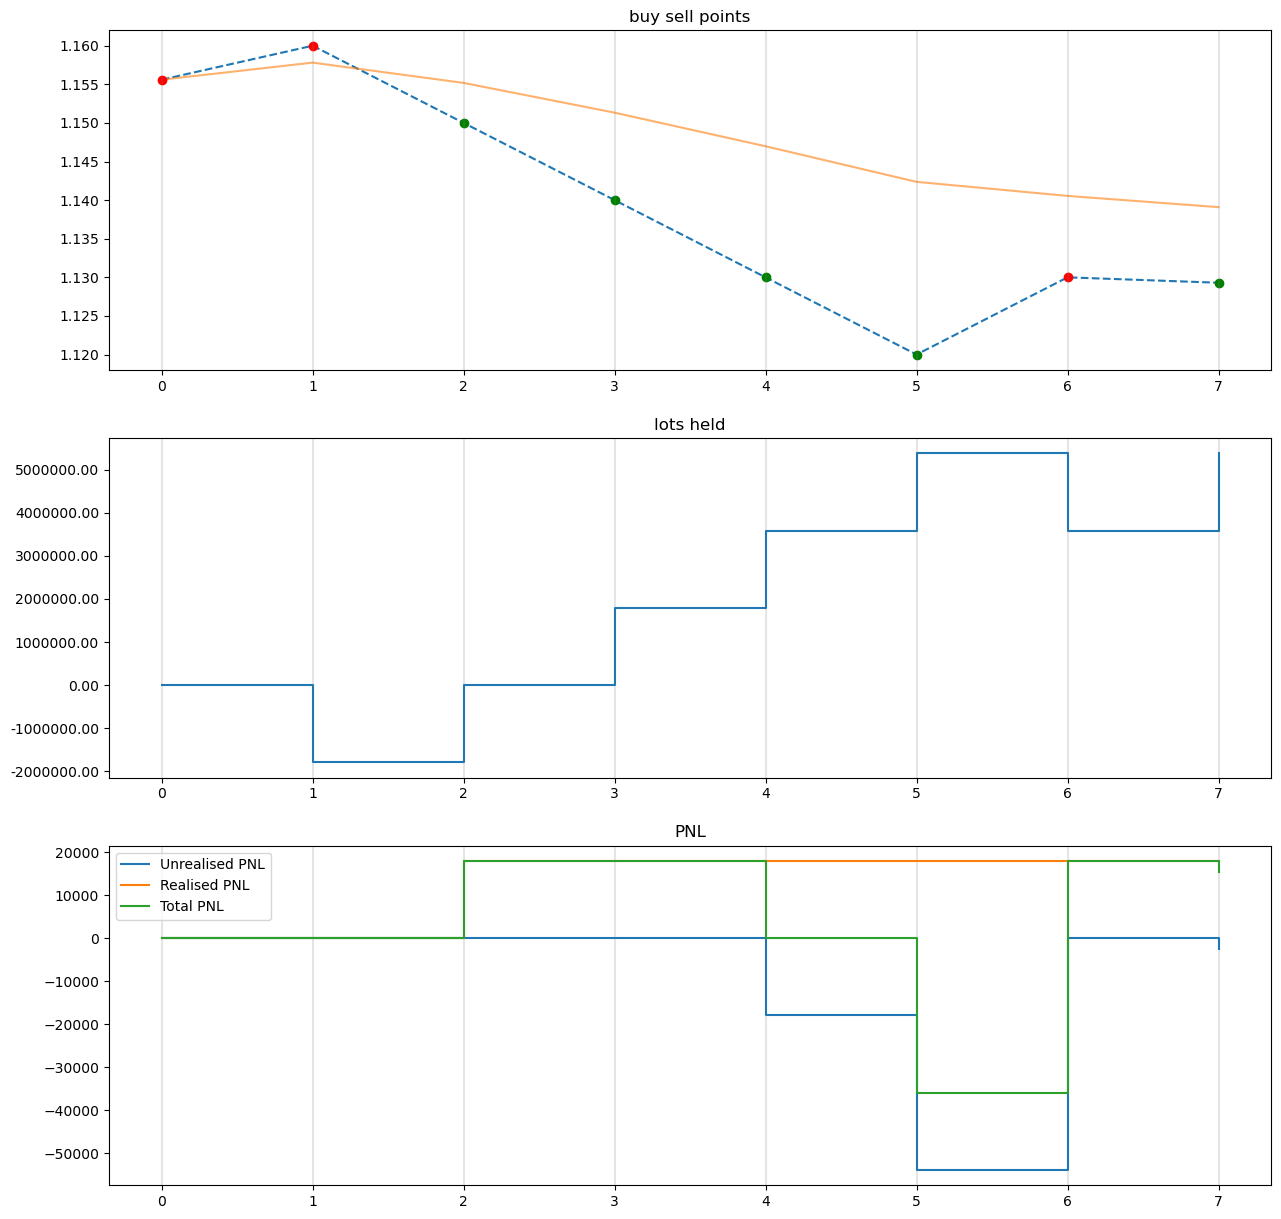

Month: December
Optimal G: 0.001
Optimal n: 890392
Optimal net profit: 165790.9904
Computing time:65.50698471069336
maximum loss: -5342.352
min unrealized PNL: -32054.112
maximum position: 9999102.16
Realized profit: 165790.9904



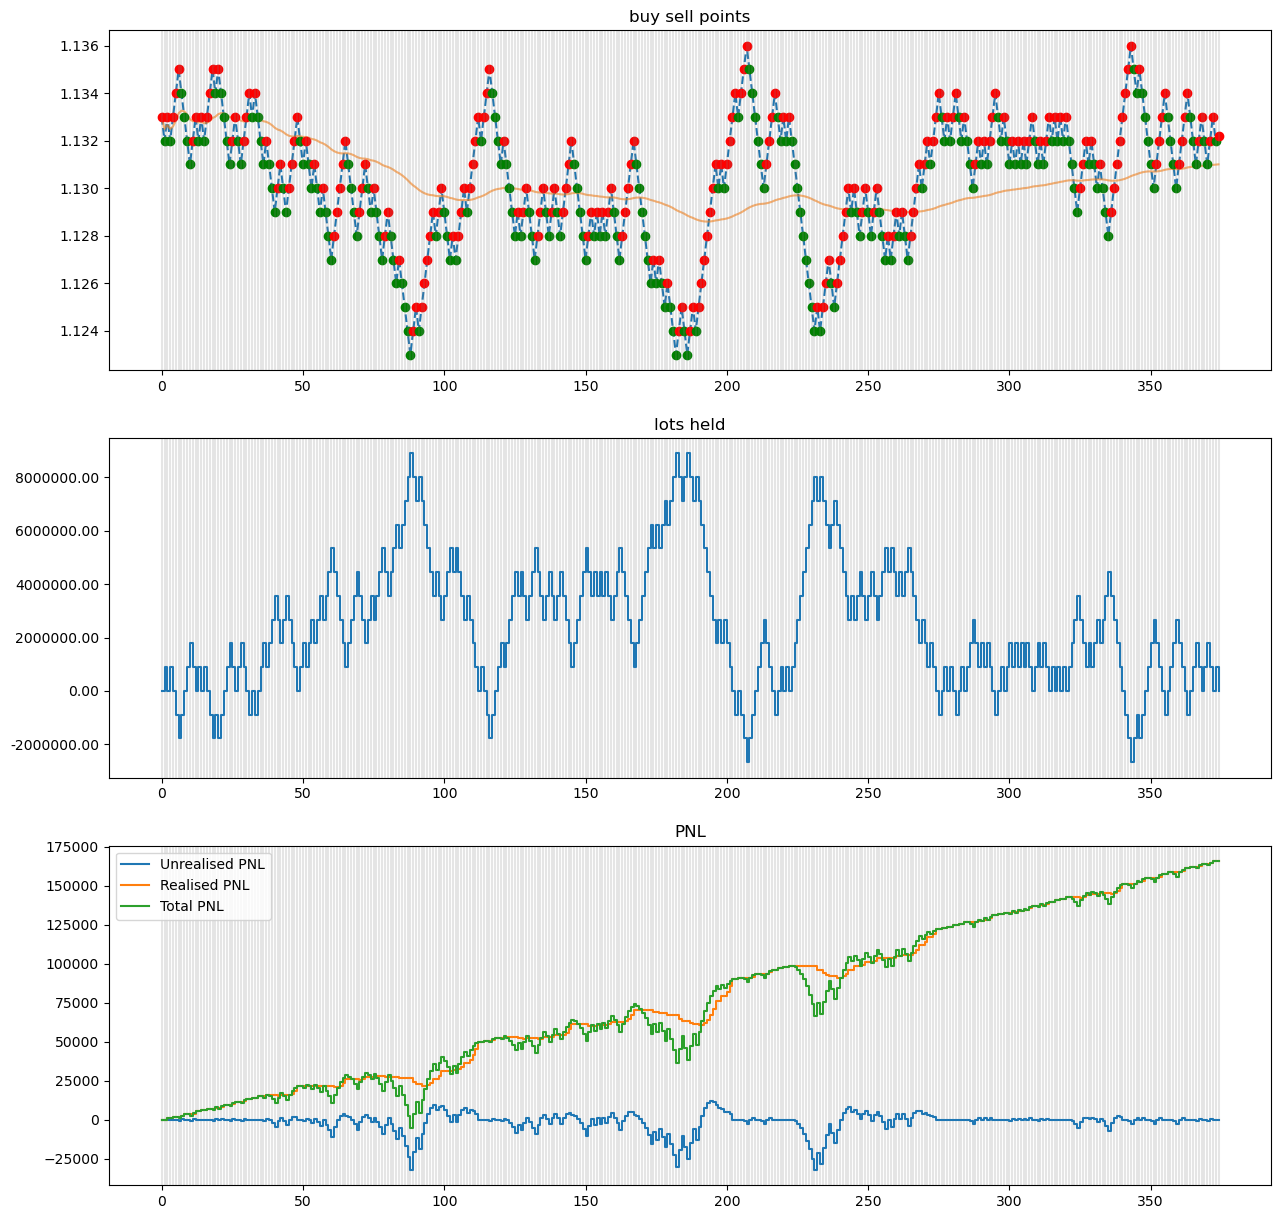

In [21]:
# intuitive G and n neighbor solution
def neighbor_solution(G, n):
    delta_G_step = np.random.choice([-0.002,-0.001, 0, 0.001, 0.002])  # G can decrease, stay the same, or increase
    delta_n = np.random.randint(-10001, 10001)  
    new_G = np.clip(G + delta_G_step, 0.001, 0.01)  # Ensure G stays within the [0.001, 0.01] range
    new_n = np.clip(n + delta_n, 100000, 5000000)  # Ensure n stays within the [100000, 5000000] range
    return new_G, new_n

# Run simulated annealing for each month and print the results
for month, data in months_data.items():
    time1 = time.time()
    best_G, best_n, best_value = simulated_annealing(data, initial_temperature, cooling_rate)
    time2 = time.time()
    print(f"Month: {month}")
    print(f"Optimal G: {best_G}")
    print(f"Optimal n: {best_n}")
    print(f"Optimal net profit: {best_value}")
    print(f"Computing time:{time2-time1}")
    maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(data,best_G,best_n)
    print(f"maximum loss: {maximum_loss}")
    print(f"min unrealized PNL: {min_unrealized_PNL}")
    print(f"maximum position: {max_pos}")
    print(f"Realized profit: {realized_pnl}\n")
    _,_,_,_,_ = run_strategy_eval(data, best_G, best_n, trade_plot=True)


## n also intuitive in 10K

Month: January
Optimal G: 0.005
Optimal n: 4050000
Optimal net profit: 124031.25
Computing time:45.701075315475464
maximum loss: -20250.0
min unrealized PNL: -20250.0
maximum position: 9963000.0
Realized profit: 124031.25



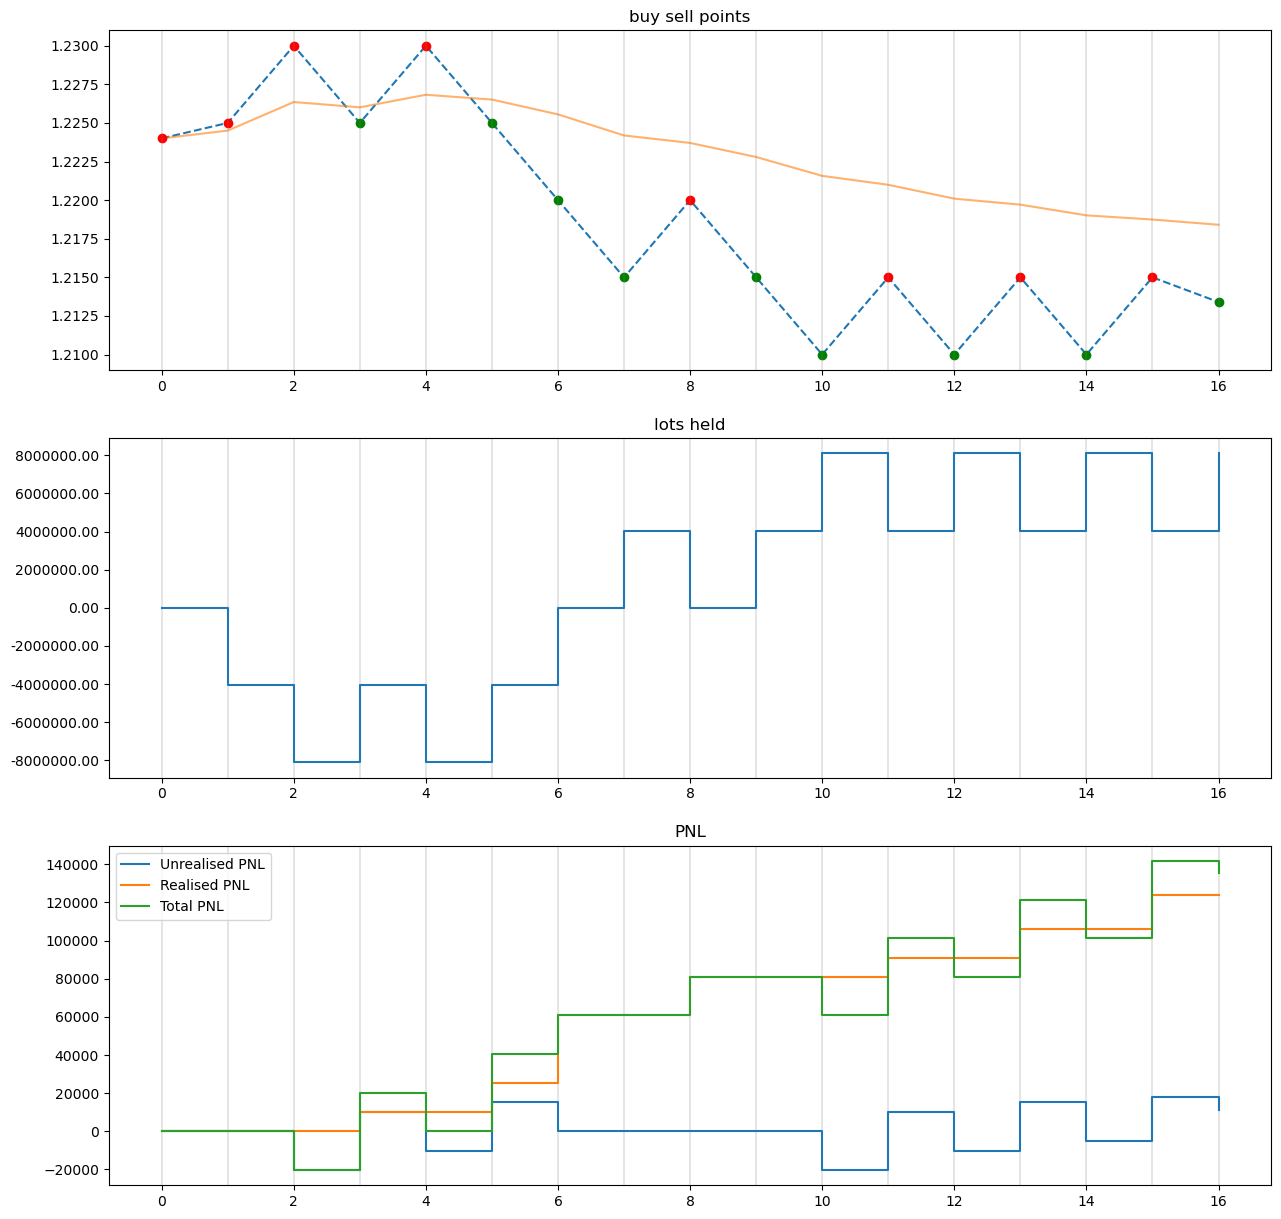

Month: February
Optimal G: 0.009000000000000001
Optimal n: 4070000
Optimal net profit: 177859.0
Computing time:37.24667310714722
maximum loss: 0
min unrealized PNL: -36630.0
maximum position: 9963360.0
Realized profit: 177859.0



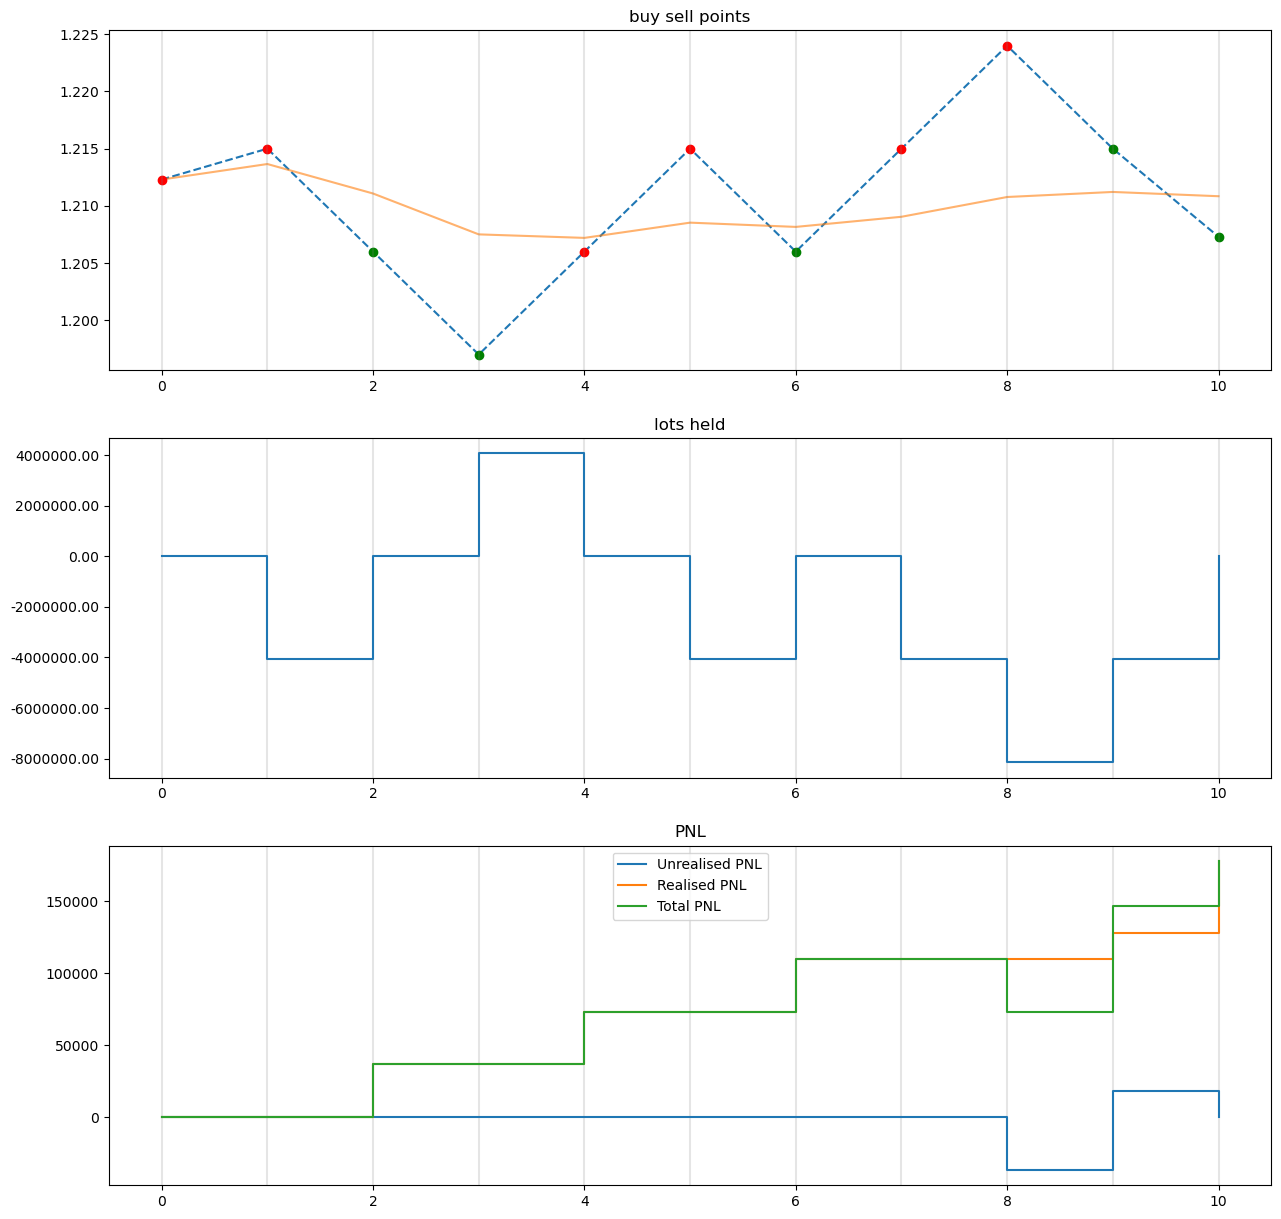

Month: March
Optimal G: 0.007
Optimal n: 1700000
Optimal net profit: 38675.0
Computing time:42.05012035369873
maximum loss: -48960.0
min unrealized PNL: -87635.0
maximum position: 9964550.0
Realized profit: 38675.0



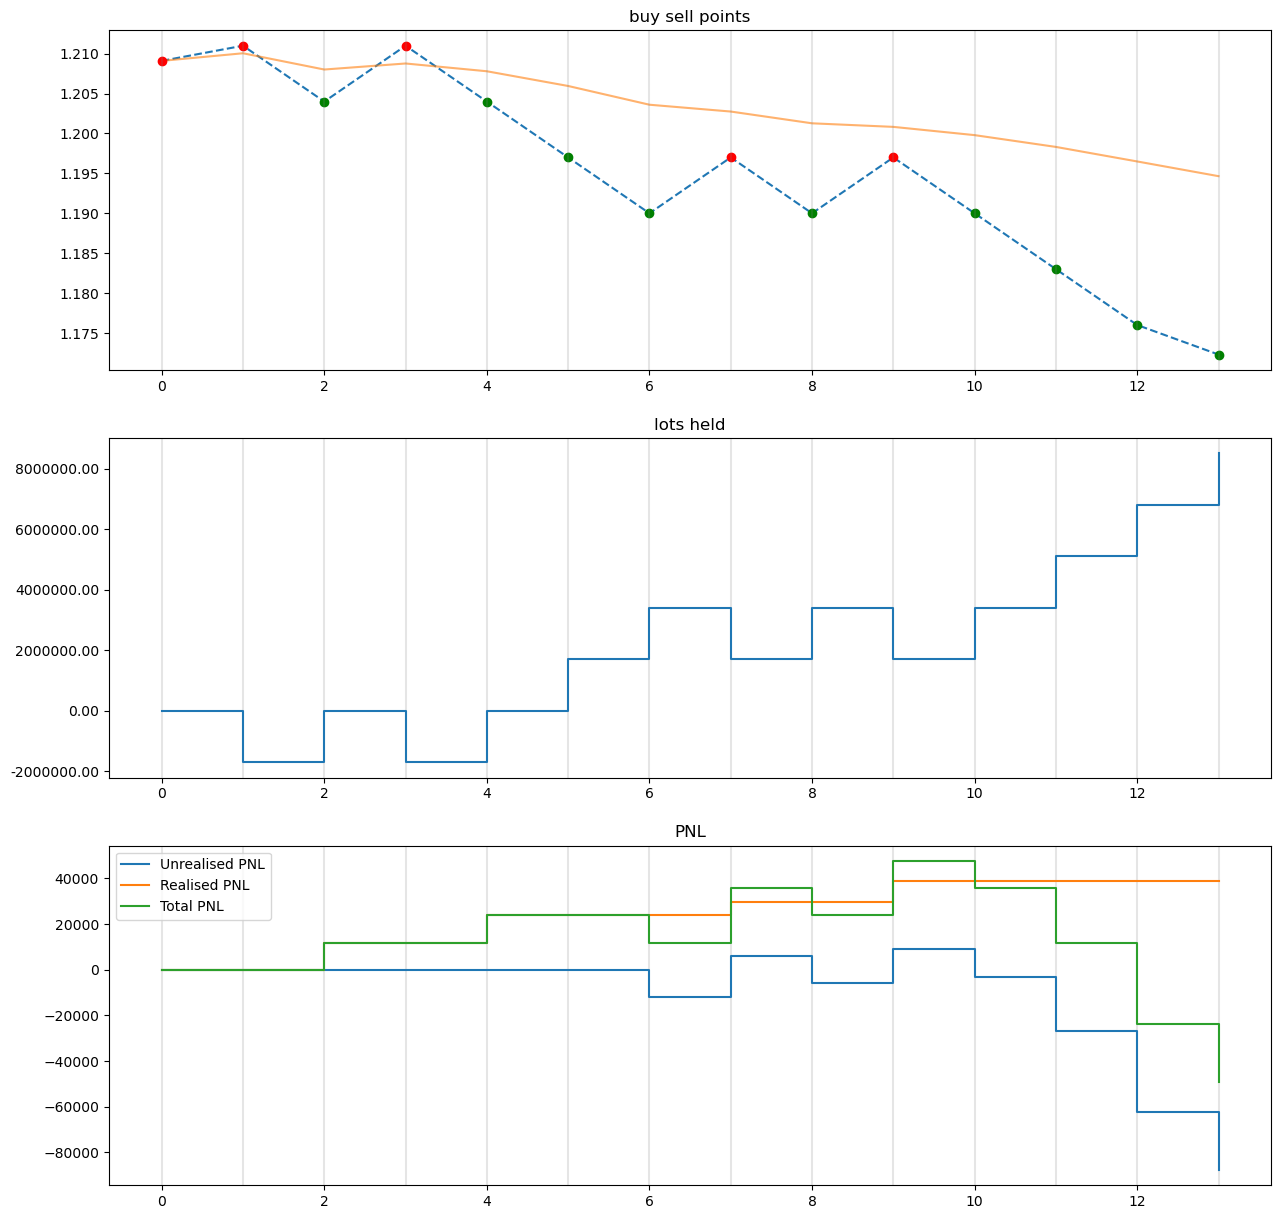

Month: April
Optimal G: 0.01
Optimal n: 2060000
Optimal net profit: 20600.0
Computing time:28.87839365005493
maximum loss: -56650.0
min unrealized PNL: -77250.0
maximum position: 9991000.0
Realized profit: 20600.0



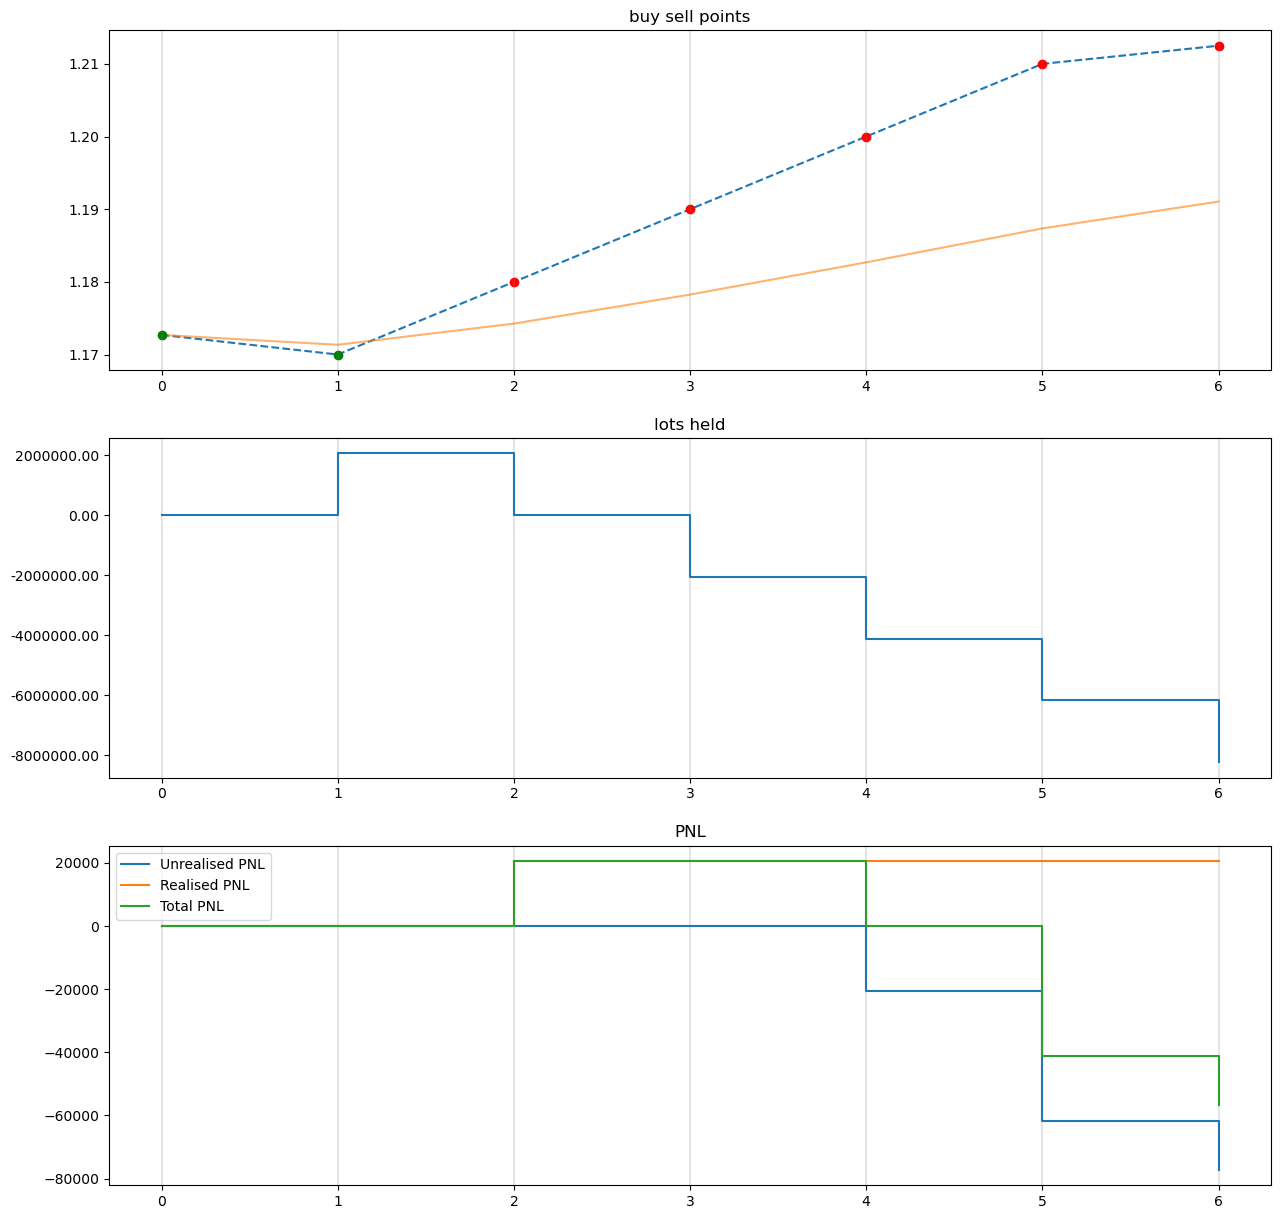

Month: May
Optimal G: 0.008
Optimal n: 4080000
Optimal net profit: 106080.0
Computing time:30.979856729507446
maximum loss: 0
min unrealized PNL: -32640.0
maximum position: 9987840.0
Realized profit: 106080.0



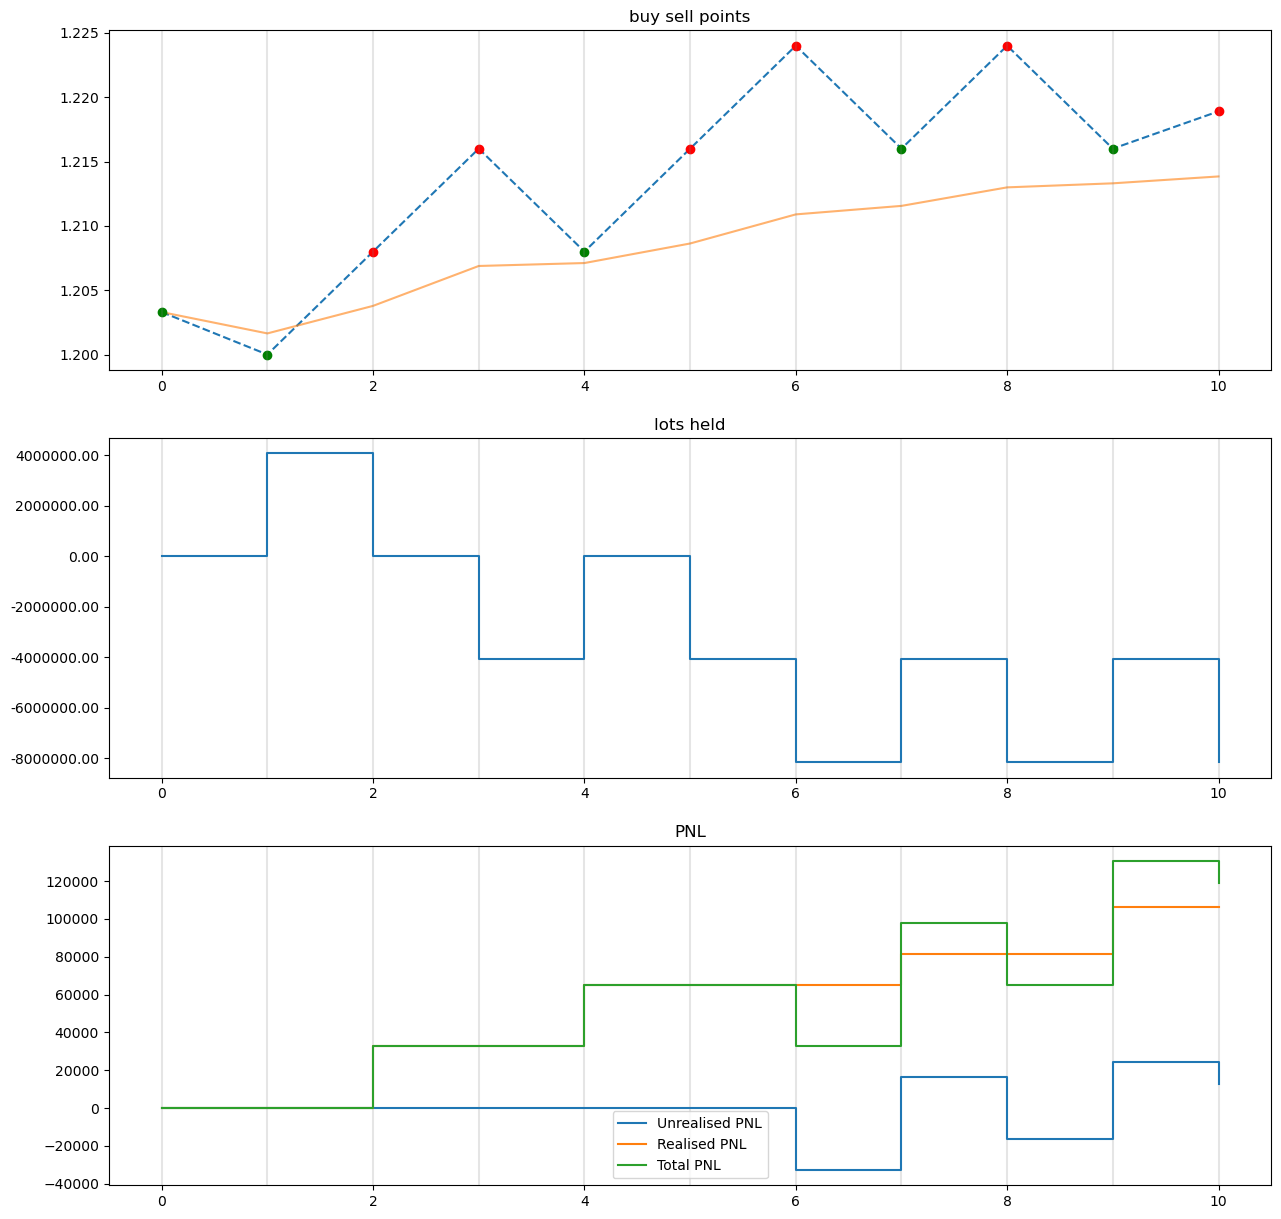

Month: June
Optimal G: 0.007
Optimal n: 2100000
Optimal net profit: 22050.0
Computing time:30.454829454421997
maximum loss: -58800.0
min unrealized PNL: -88200.0
maximum position: 9996000.0
Realized profit: 22050.0



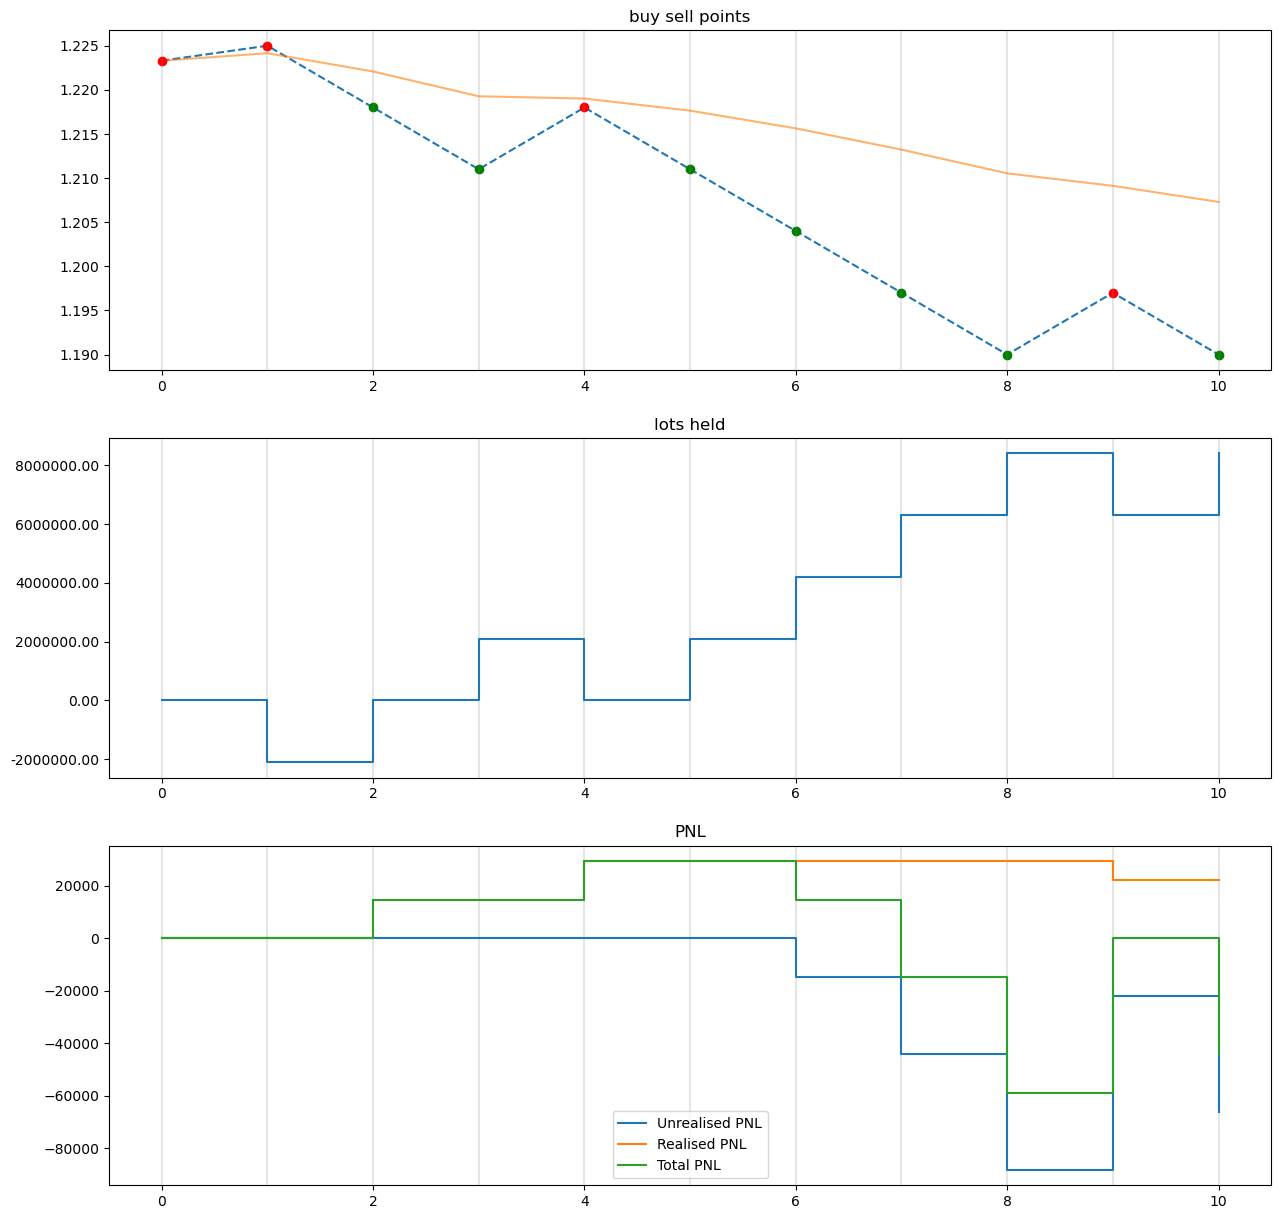

Month: July
Optimal G: 0.002
Optimal n: 2120000
Optimal net profit: 182320.0002
Computing time:41.22988033294678
maximum loss: 0
min unrealized PNL: -17902.2222
maximum position: 9972480.0
Realized profit: 182320.0002



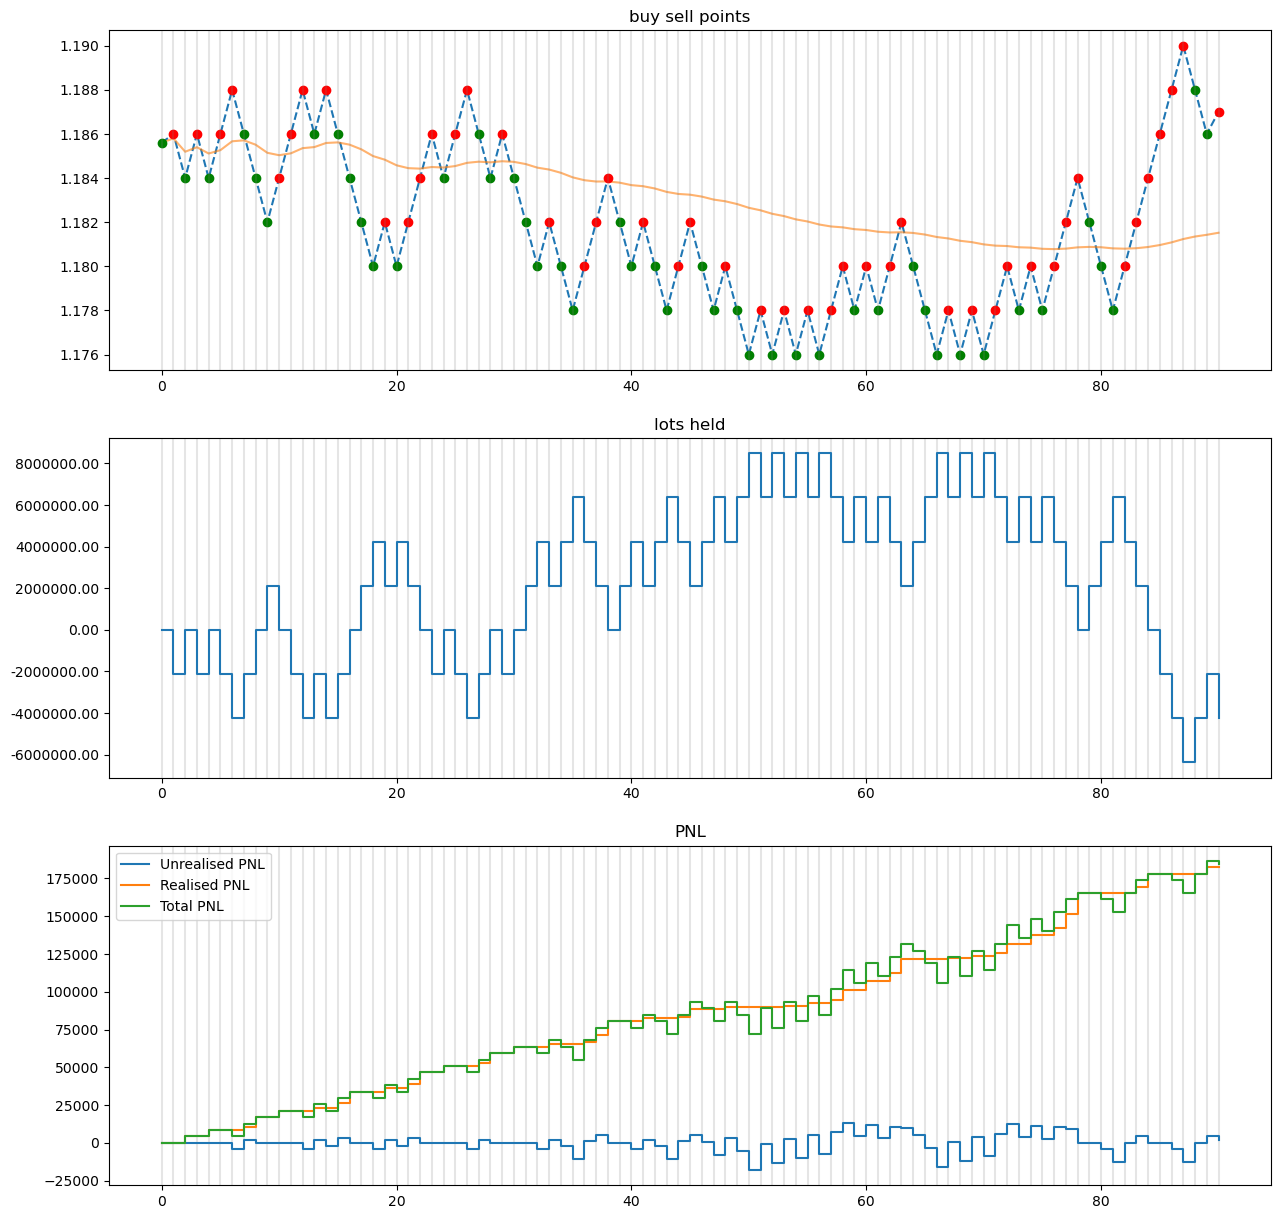

Month: August
Optimal G: 0.01
Optimal n: 5000000
Optimal net profit: 100000.0
Computing time:20.813396215438843
maximum loss: 0
min unrealized PNL: 0
maximum position: 5950000.0
Realized profit: 100000.0



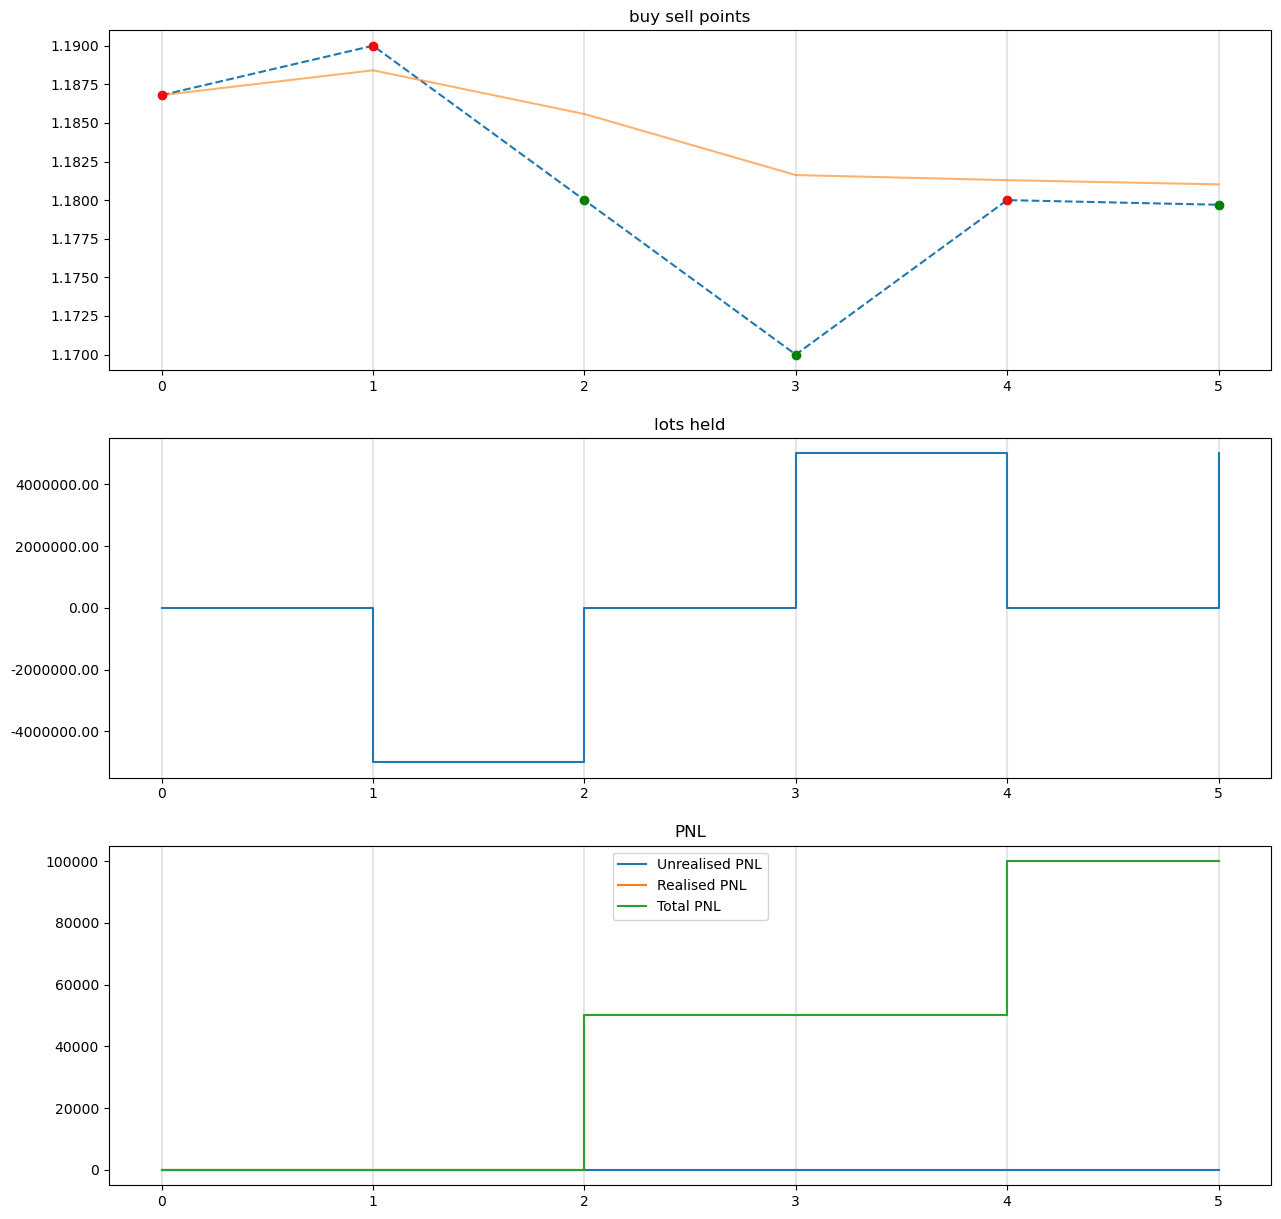

Month: September
Optimal G: 0.007
Optimal n: 2870000
Optimal net profit: 40180.0
Computing time:27.53882598876953
maximum loss: -20090.0
min unrealized PNL: -30422.0
maximum position: 9989322.0
Realized profit: 40180.0



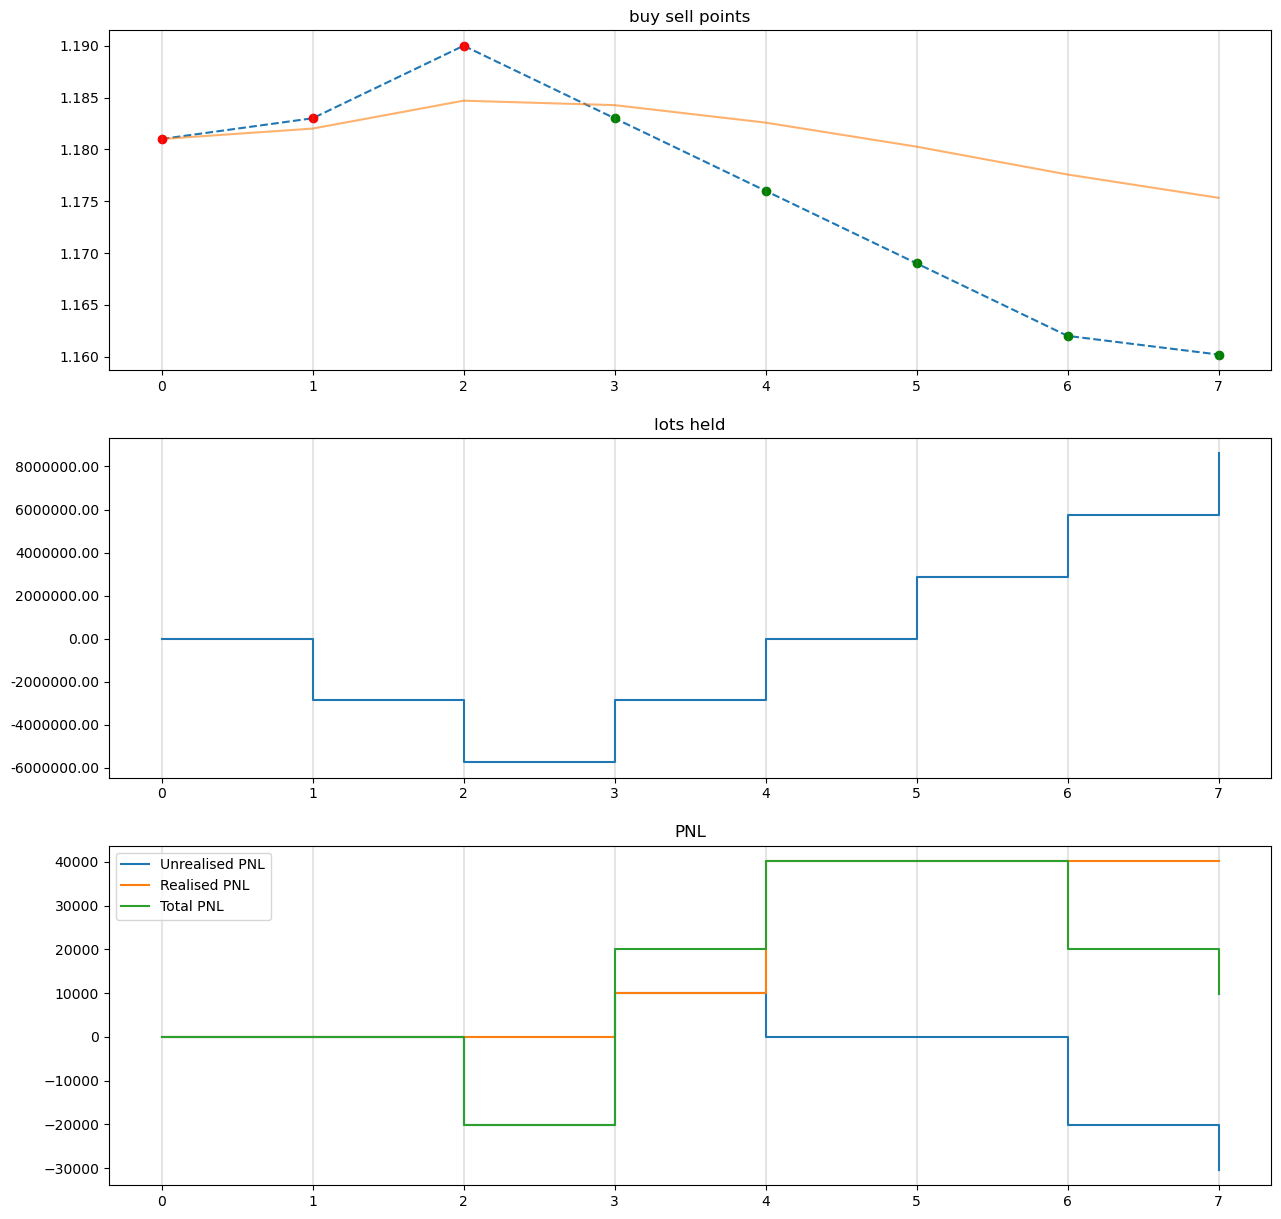

Month: October
Optimal G: 0.007
Optimal n: 5000000
Optimal net profit: 109000.0
Computing time:33.62069344520569
maximum loss: 0
min unrealized PNL: 0
maximum position: 5845000.0
Realized profit: 109000.0



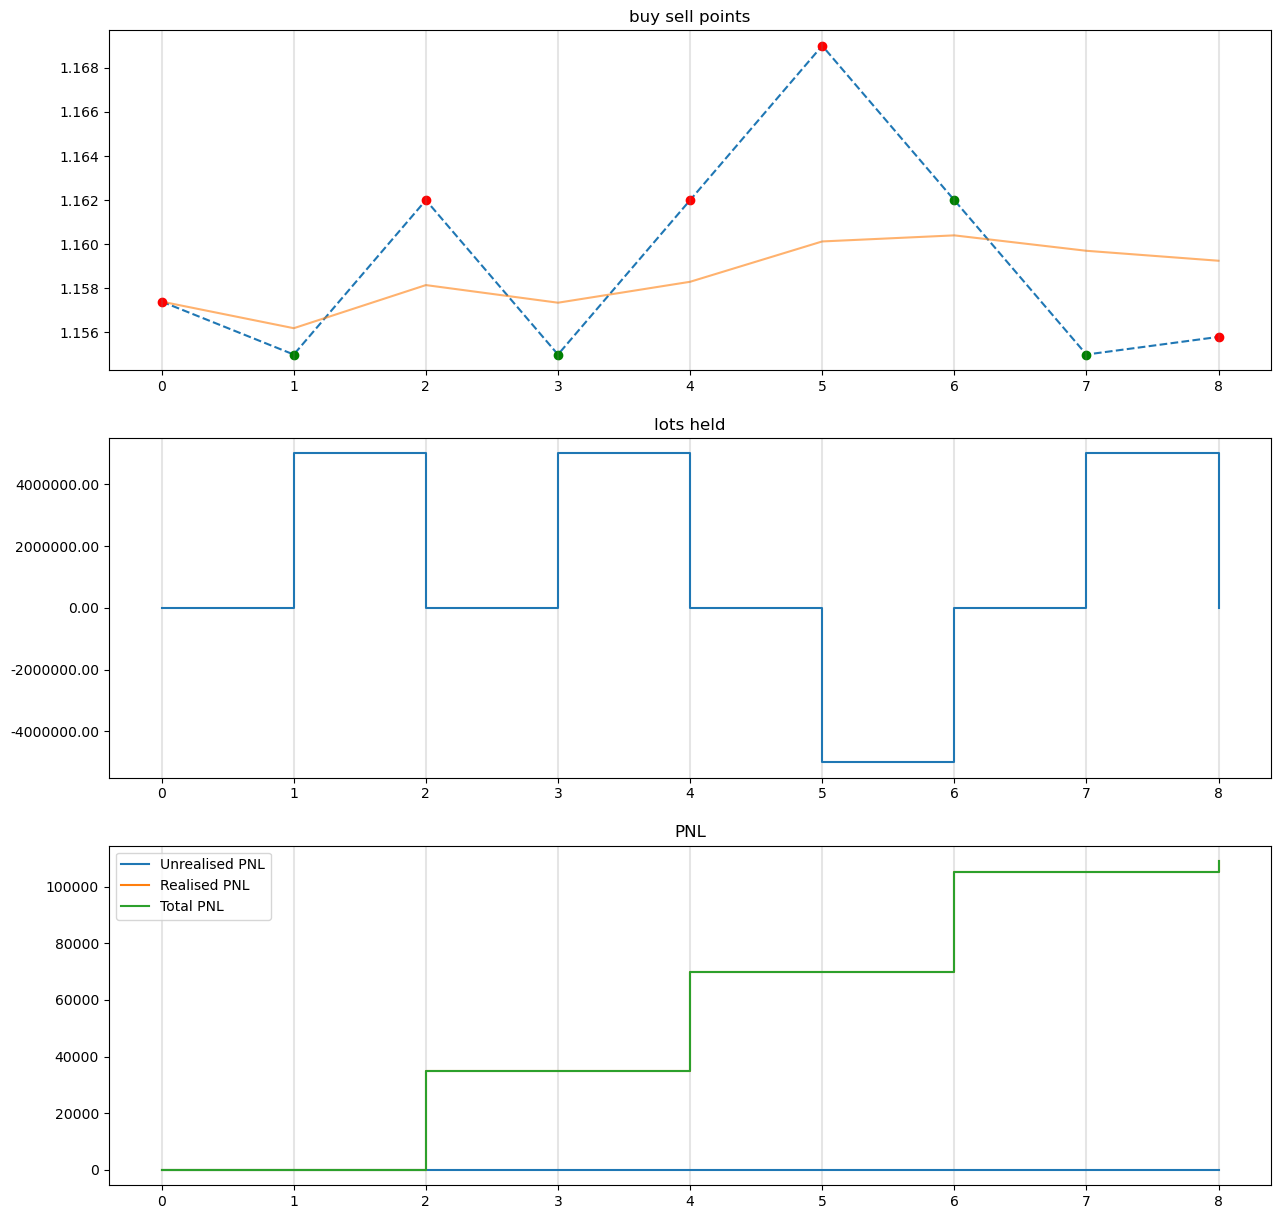

Month: November
Optimal G: 0.01
Optimal n: 2950000
Optimal net profit: 29500.0
Computing time:32.635363817214966
maximum loss: -59000.0
min unrealized PNL: -88500.0
maximum position: 9994305.0
Realized profit: 29500.0



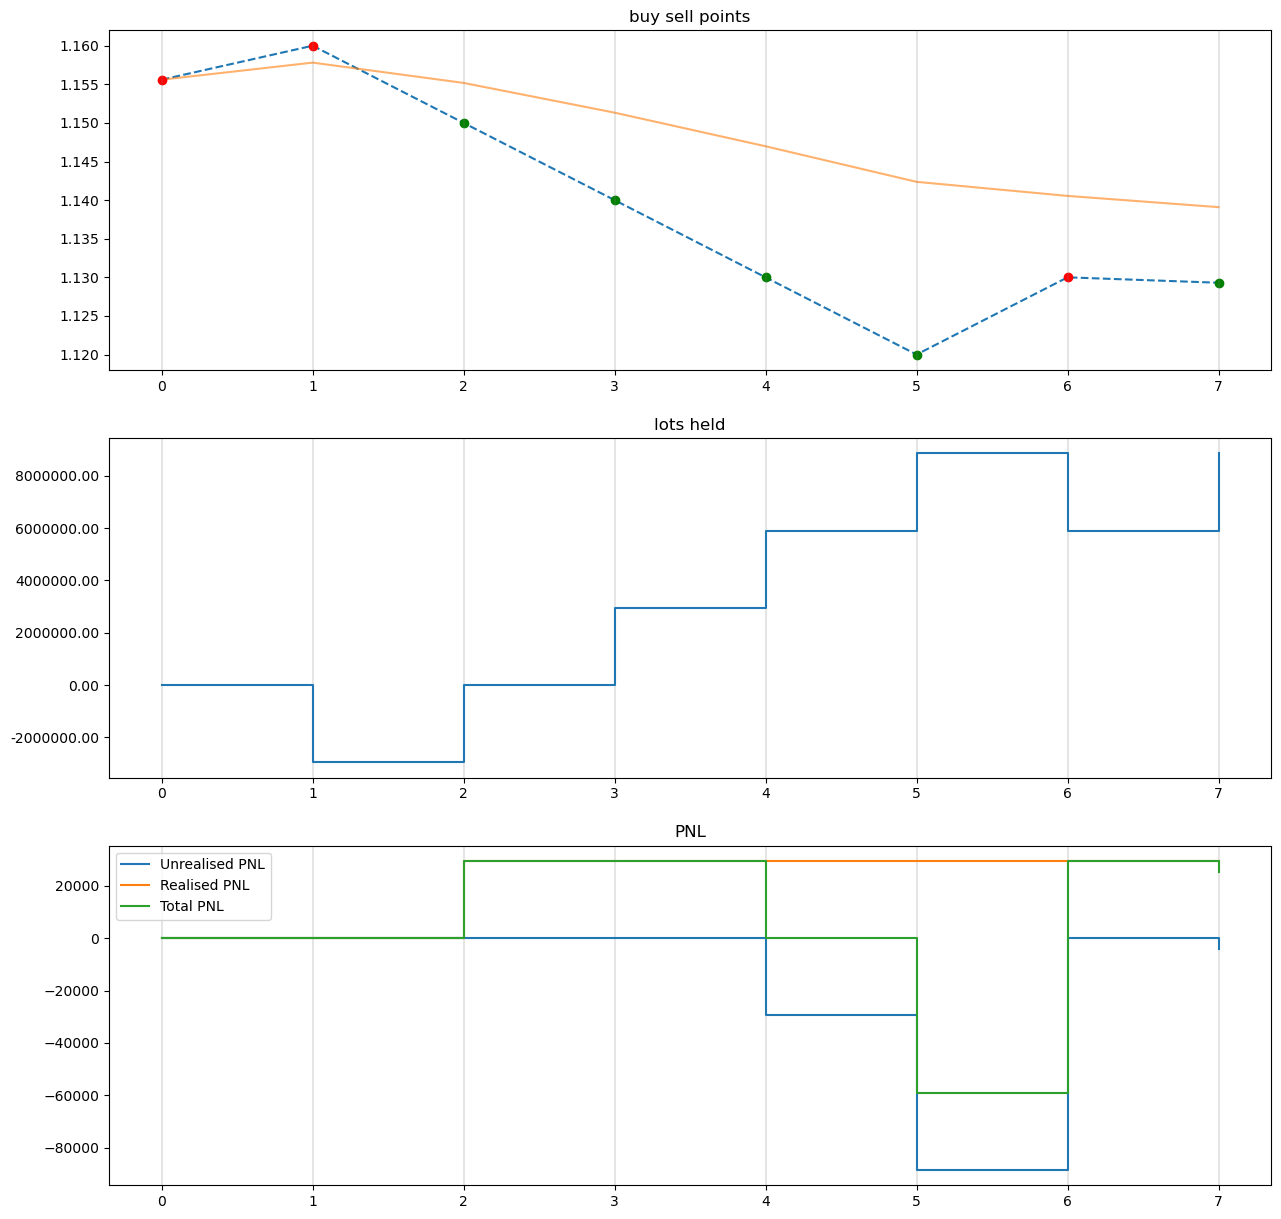

Month: December
Optimal G: 0.003
Optimal n: 4440000
Optimal net profit: 293040.0
Computing time:40.544573068618774
maximum loss: 0
min unrealized PNL: -13320.0
maximum position: 9990000.0
Realized profit: 293040.0



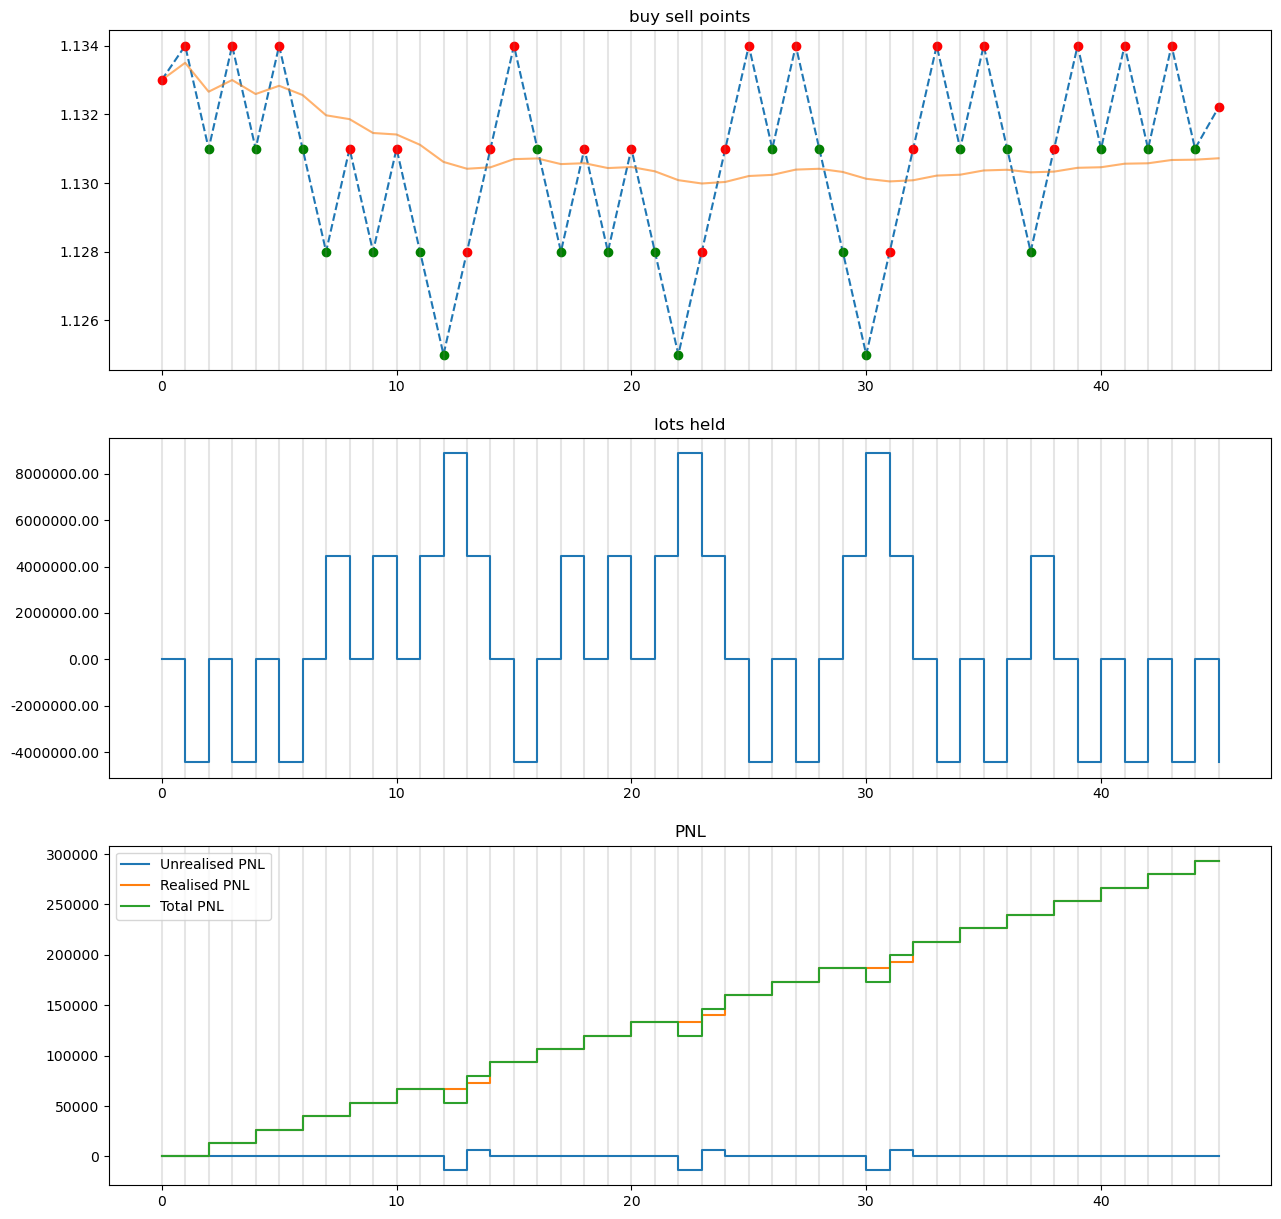

In [8]:
# intuitive G and n neighbor solution
def neighbor_solution(G, n):
    delta_G_step = np.random.choice([-0.002,-0.001, 0, 0.001, 0.002])  # G can decrease, stay the same, or increase
    delta_n = np.random.randint(-100, 101) * 10000  # Generates a number in the range of -100 to 100 and multiplies it by 10,000
    new_G = np.clip(G + delta_G_step, 0.001, 0.01)  # Ensure G stays within the [0.001, 0.01] range
    new_n = np.clip(n + delta_n, 100000, 5000000)  # Ensure n stays within the [100000, 5000000] range
    return new_G, new_n

# Run simulated annealing for each month and print the results
for month, data in months_data.items():
    time1 = time.time()
    best_G, best_n, best_value = simulated_annealing(data, initial_temperature, cooling_rate)
    time2 = time.time()
    print(f"Month: {month}")
    print(f"Optimal G: {best_G}")
    print(f"Optimal n: {best_n}")
    print(f"Optimal net profit: {best_value}")
    print(f"Computing time:{time2-time1}")
    maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(data,best_G,best_n)
    print(f"maximum loss: {maximum_loss}")
    print(f"min unrealized PNL: {min_unrealized_PNL}")
    print(f"maximum position: {max_pos}")
    print(f"Realized profit: {realized_pnl}\n")
    _,_,_,_,_ = run_strategy_eval(data, best_G, best_n, trade_plot=True)


## n is vary

Optimal G: 0.001
Optimal n: 810349
Optimal net profit: 15781.5466

Computing time:619.566543340683
maximum loss: -217173.532
min unrealized PNL: -85855.8392
maximum position: 9999706.66
Realized profit: 15781.5466



c:\Users\Jenny\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


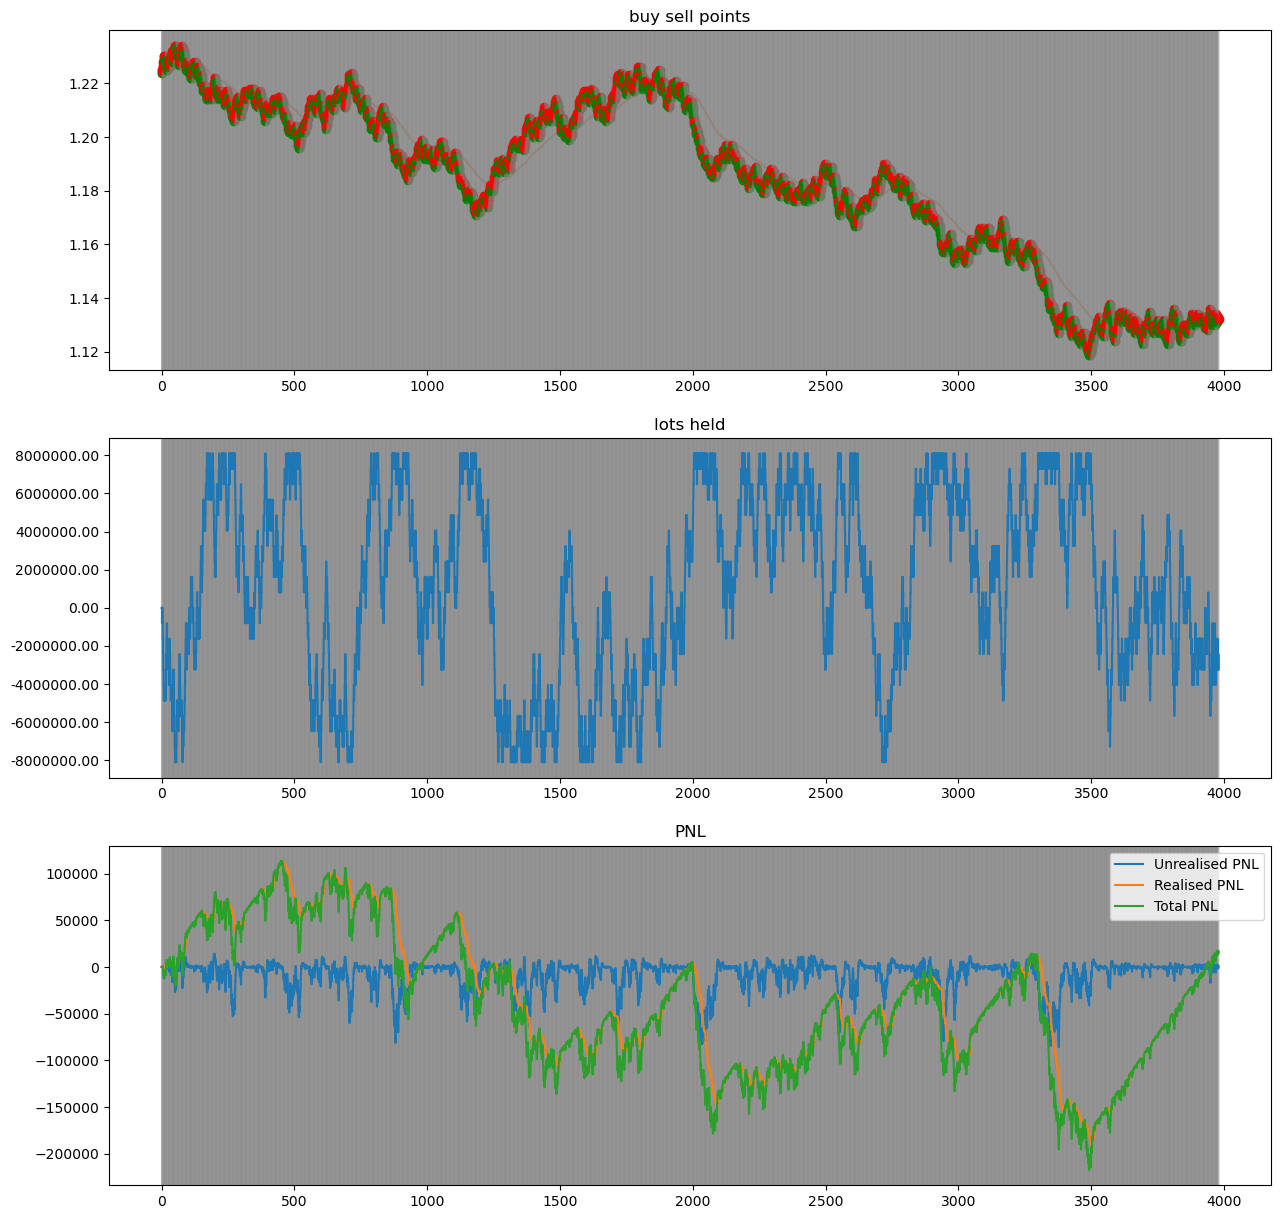

In [22]:
def objective_function(G, n, tick_data):
    max_loss, U_PNL, max_position, R_PNL = run_strategy_optimised(tick_data, G, n)
    return R_PNL if (max_position <= 10e6 and U_PNL >= -150e3 and max_loss >= -500e3) else float('-inf')

def simulated_annealing(tick_data, initial_temperature, cooling_rate):
       
    #initial guess
    current_G = 0.001
    current_n = 600000
    current_value = objective_function(current_G, current_n, tick_data)
    best_G, best_n, best_value = current_G, current_n, current_value

    temperature = initial_temperature
    no_improve_count = 0

    while temperature > 0.01:
        new_G, new_n = neighbor_solution(current_G, current_n)
        new_value = objective_function(new_G, new_n, tick_data)

        # If the new solution is better or with certain probability based on the difference in objective value and temperature
        if new_value > current_value or np.random.rand() < np.exp((new_value - current_value) / temperature):
            current_G, current_n, current_value = new_G, new_n, new_value

            # Update the best solution if the current one is better
            if current_value > best_value:
                best_G, best_n, best_value = current_G, current_n, current_value

        if new_value > best_value:
            best_G, best_n, best_value = current_G, current_n, current_value
            no_improve_count = 0  # reset the count when a better solution is found
        else:
            no_improve_count += 1
        
        if no_improve_count >= 1000:   
            break  # exit the loop if no improvement is seen for a specified number of iterations
            
        temperature *= cooling_rate

    return best_G, best_n, best_value

time1 = time.time()
best_G, best_n, best_value = simulated_annealing(Year_data, initial_temperature, cooling_rate)
time2 = time.time()
print(f"Optimal G: {best_G}")
print(f"Optimal n: {best_n}")
print(f"Optimal net profit: {best_value}\n")
print(f"Computing time:{time2-time1}")
maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(Year_data,best_G,best_n)
print(f"maximum loss: {maximum_loss}")
print(f"min unrealized PNL: {min_unrealized_PNL}")
print(f"maximum position: {max_pos}")
print(f"Realized profit: {realized_pnl}\n")
_,_,_,_,_ = run_strategy_eval(Year_data, best_G, best_n, trade_plot=True)

## n in 10K

Optimal G: 0.001
Optimal n: 810000
Optimal net profit: 15774.7507

Computing time:543.8886041641235
maximum loss: -217080.0
min unrealized PNL: -85818.863
maximum position: 9995400.0
Realized profit: 15774.7507



c:\Users\Jenny\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


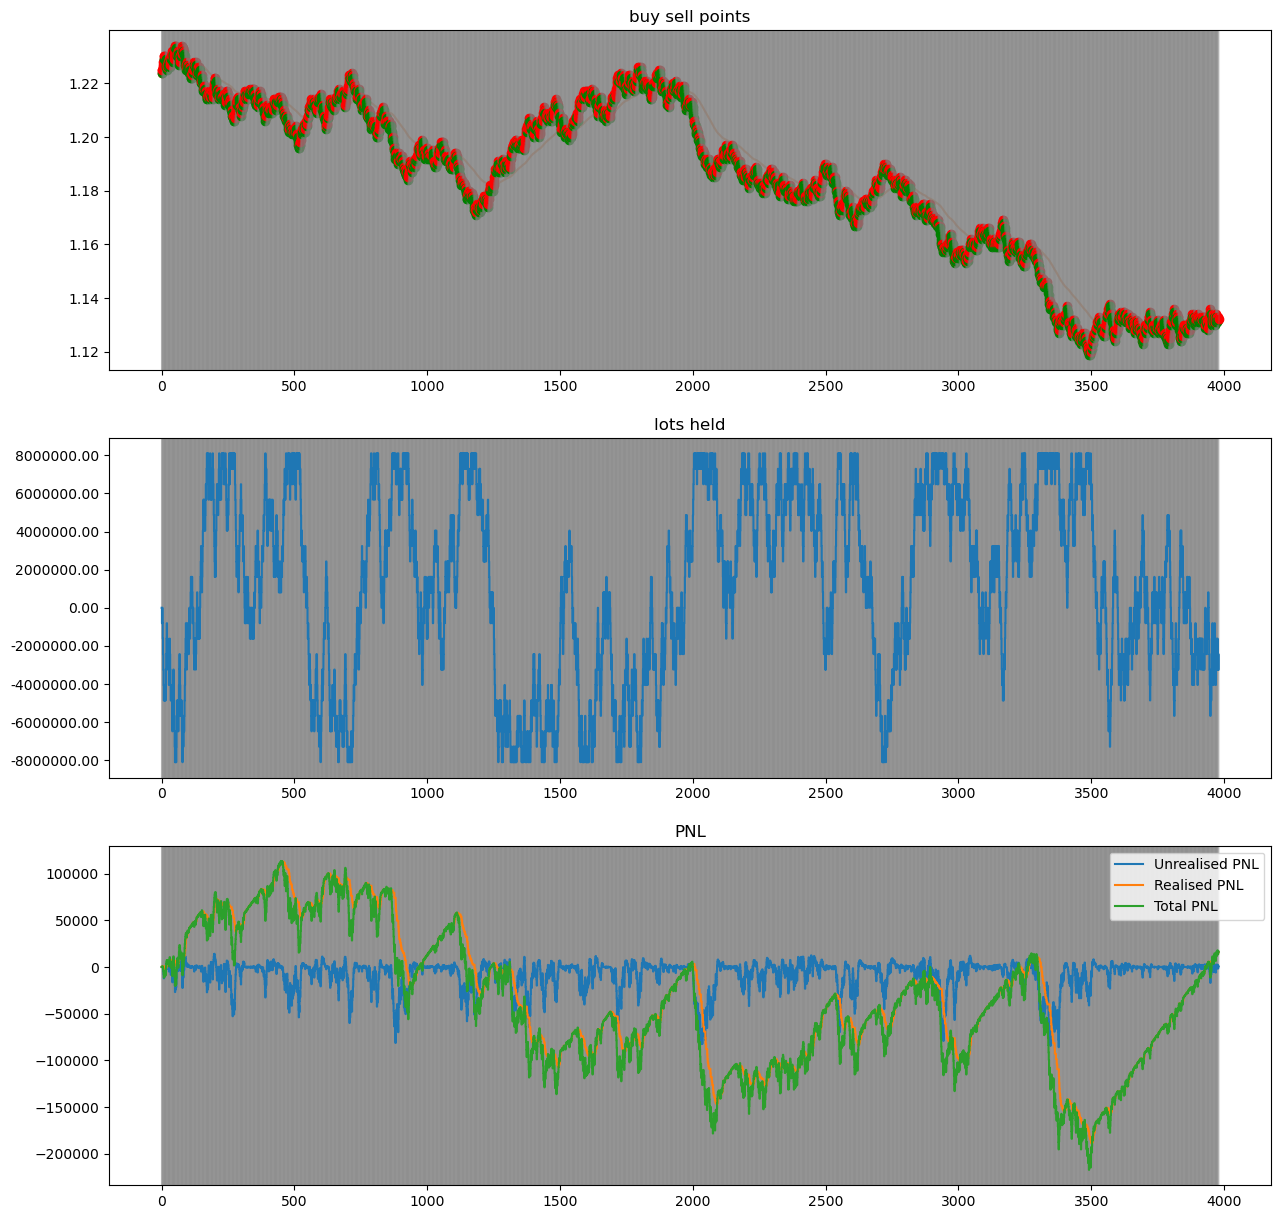

In [9]:
def objective_function(G, n, tick_data):
    max_loss, U_PNL, max_position, R_PNL = run_strategy_optimised(tick_data, G, n)
    return R_PNL if (max_position <= 10e6 and U_PNL >= -150e3 and max_loss >= -500e3) else float('-inf')

def simulated_annealing(tick_data, initial_temperature, cooling_rate):
       
    #initial guess
    current_G = 0.001
    current_n = 600000
    current_value = objective_function(current_G, current_n, tick_data)
    best_G, best_n, best_value = current_G, current_n, current_value

    temperature = initial_temperature
    no_improve_count = 0

    while temperature > 0.01:
        new_G, new_n = neighbor_solution(current_G, current_n)
        new_value = objective_function(new_G, new_n, tick_data)

        # If the new solution is better or with certain probability based on the difference in objective value and temperature
        if new_value > current_value or np.random.rand() < np.exp((new_value - current_value) / temperature):
            current_G, current_n, current_value = new_G, new_n, new_value

            # Update the best solution if the current one is better
            if current_value > best_value:
                best_G, best_n, best_value = current_G, current_n, current_value

        if new_value > best_value:
            best_G, best_n, best_value = current_G, current_n, current_value
            no_improve_count = 0  # reset the count when a better solution is found
        else:
            no_improve_count += 1
        
        if no_improve_count >= 1000:   
            break  # exit the loop if no improvement is seen for a specified number of iterations
            
        temperature *= cooling_rate

    return best_G, best_n, best_value

time1 = time.time()
best_G, best_n, best_value = simulated_annealing(Year_data, initial_temperature, cooling_rate)
time2 = time.time()
print(f"Optimal G: {best_G}")
print(f"Optimal n: {best_n}")
print(f"Optimal net profit: {best_value}\n")
print(f"Computing time:{time2-time1}")
maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(Year_data,best_G,best_n)
print(f"maximum loss: {maximum_loss}")
print(f"min unrealized PNL: {min_unrealized_PNL}")
print(f"maximum position: {max_pos}")
print(f"Realized profit: {realized_pnl}\n")
_,_,_,_,_ = run_strategy_eval(Year_data, best_G, best_n, trade_plot=True)

# Grid search

In [24]:
def profit_heat_map_for_gridsearch(profits, ladder_sizing, position_sizing, title):
    plt.figure(figsize=(10,10))
    
    position_sizing_in_K = [int(val) for val in np.array(position_sizing) / 1000]

    ax = sns.heatmap(profits, cbar=True, alpha=0.7)
    
    for i in range(len(ladder_sizing)):
        for j in range(len(position_sizing)):
            ax.text(j+0.5, i+0.5, f"{profits[i, j]:.2f}", 
                    ha='center', va='center', color='black', fontsize=7)
    
    plt.xticks(np.arange(len(position_sizing)) + 0.5, position_sizing_in_K)
    
    rounded_labels = [round(val, 3) for val in ladder_sizing]  # Rounding to 3 decimal places
    plt.yticks(np.arange(len(ladder_sizing)) + 0.5, rounded_labels)
    
    plt.xlabel('Position Sizing (in K)')
    plt.ylabel('Ladder Sizing')
    plt.title(title + ' Heat Map')
    plt.show()

def optimize_gridsearch(tick_data):
    # For G: Values between 0.001 and 0.01 with an interval of 0.001
    G_values = np.arange(0.001, 0.011, 0.001)
    
    # For n: Values from 100000 to 5000000 with an interval of 500000
    n_values = np.arange(100000, 5000001, 500000)
    
    # Initialize a matrix for storing R_PNL values
    R_PNL_matrix = np.zeros((len(G_values), len(n_values)))
    
    best_profit = float('-inf')
    best_G = None
    best_n = None
    
    # Grid Search
    for i, G in enumerate(G_values):
        for j, n in enumerate(n_values):
            max_loss, U_PNL, max_position, R_PNL = run_strategy_optimised(tick_data, G, n)
            
            constraint1_okay = (max_position <= 10e6)
            constraint2_okay = (U_PNL >= -150e3)
            constraint3_okay = (max_loss >= -500e3)

            if constraint1_okay and constraint2_okay and constraint3_okay:
                R_PNL_matrix[i, j] = R_PNL
                if R_PNL > best_profit:
                    best_profit = R_PNL
                    best_G = G
                    best_n = n
            else:
                R_PNL_matrix[i, j] = np.nan
    result = {
        "best_G": best_G,
        "best_n": best_n,
        "best_profit": best_profit,
        "R_PNL_matrix": R_PNL_matrix,
        "G_values": G_values,
        "n_values": n_values  
    }  
    return result


Processing January
Optimal G: 0.005
Optimal n: 3600000
Optimal net profit: 110250.0
Computing time:5.382901191711426
maximum loss: -18000.0
min unrealized PNL: -18000.0
maximum position: 8856000.0
Realized profit: 110250.0



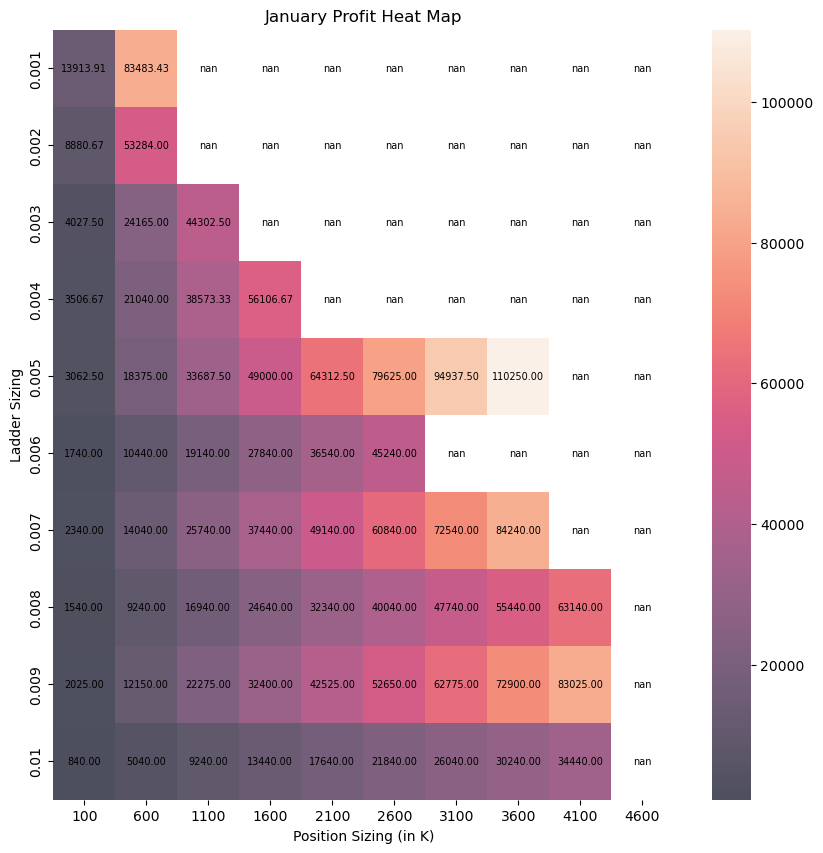


Processing February
Optimal G: 0.009000000000000001
Optimal n: 3600000
Optimal net profit: 157320.0
Computing time:4.401642084121704
maximum loss: 0
min unrealized PNL: -32400.0
maximum position: 8812800.0
Realized profit: 157320.0



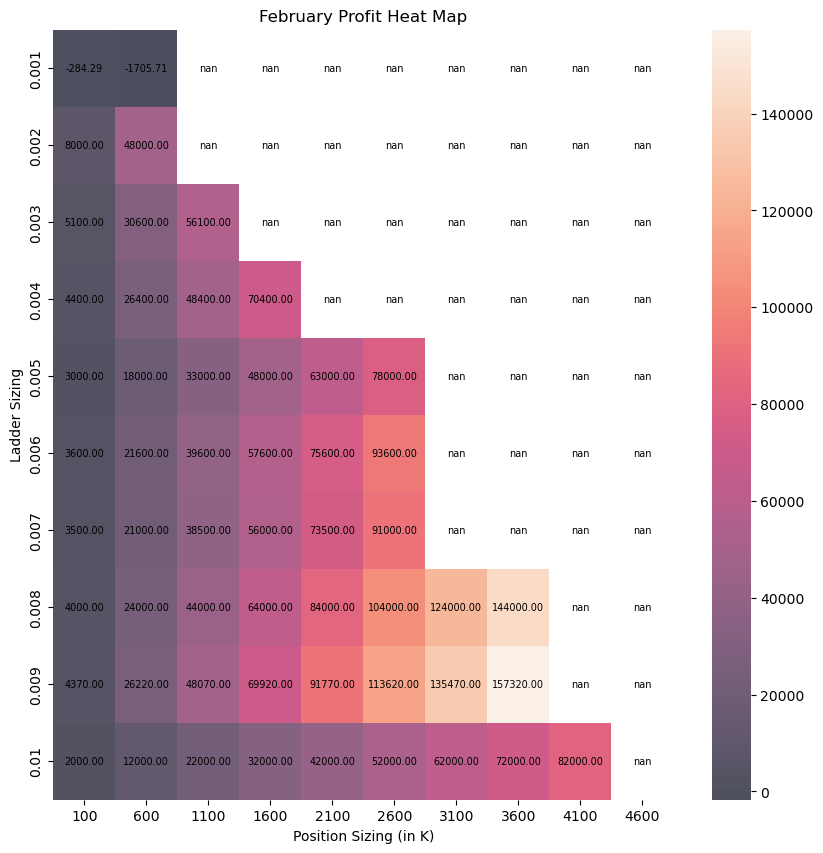


Processing March
Optimal G: 0.010000000000000002
Optimal n: 2600000
Optimal net profit: 52000.0
Computing time:4.790877103805542
maximum loss: -14040.0
min unrealized PNL: -66040.0
maximum position: 9143940.0
Realized profit: 52000.0



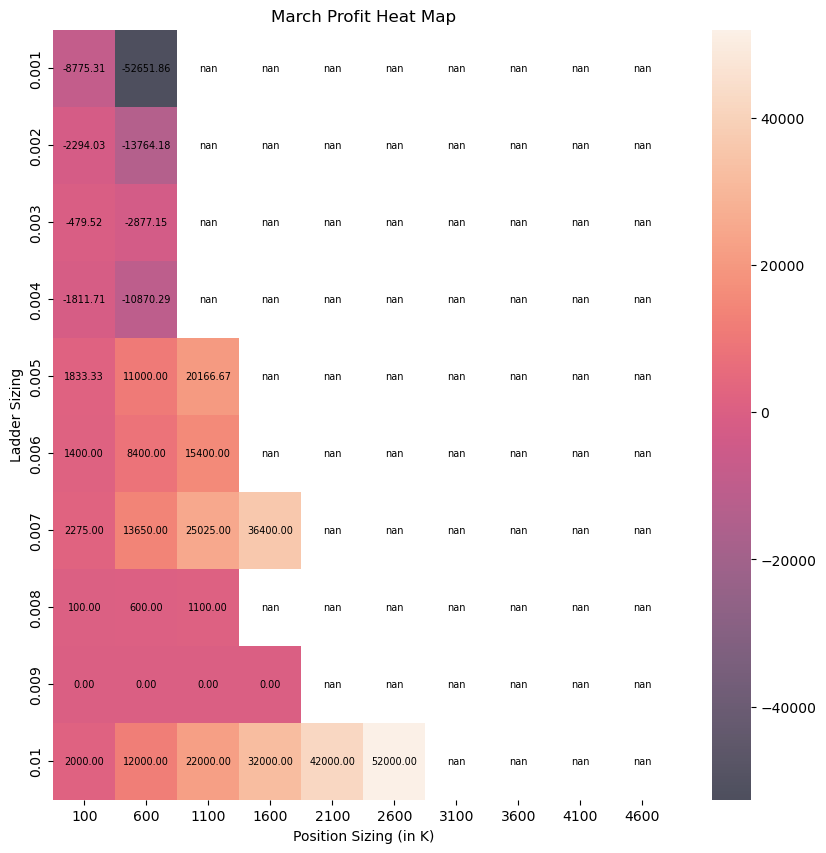


Processing April
Optimal G: 0.010000000000000002
Optimal n: 1600000
Optimal net profit: 16000.0
Computing time:3.085541009902954
maximum loss: -44000.0
min unrealized PNL: -60000.0
maximum position: 7759999.999999999
Realized profit: 16000.0



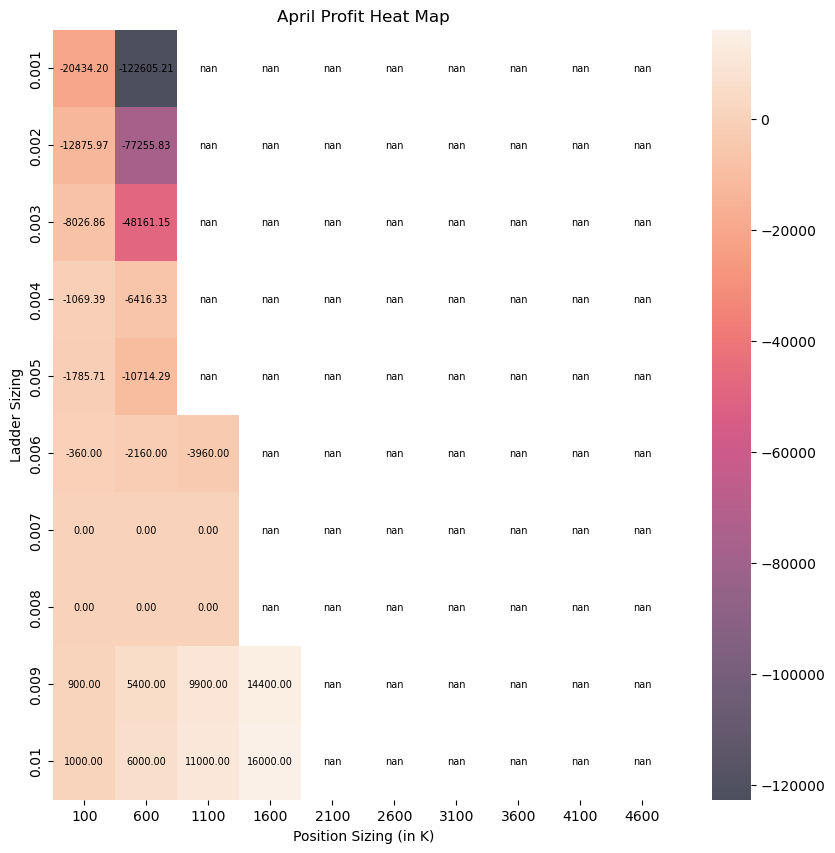


Processing May
Optimal G: 0.008
Optimal n: 3600000
Optimal net profit: 93600.0
Computing time:3.406752347946167
maximum loss: 0
min unrealized PNL: -28800.0
maximum position: 8812800.0
Realized profit: 93600.0



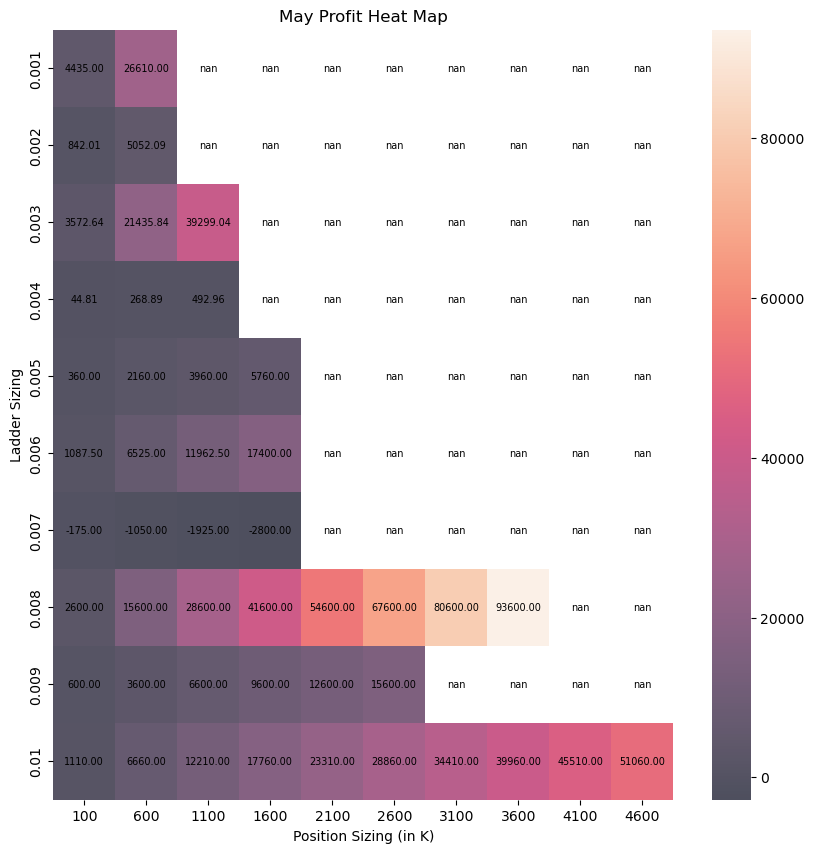


Processing June
Optimal G: 0.007
Optimal n: 2100000
Optimal net profit: 22050.0
Computing time:3.364464282989502
maximum loss: -58800.0
min unrealized PNL: -88200.0
maximum position: 9996000.0
Realized profit: 22050.0



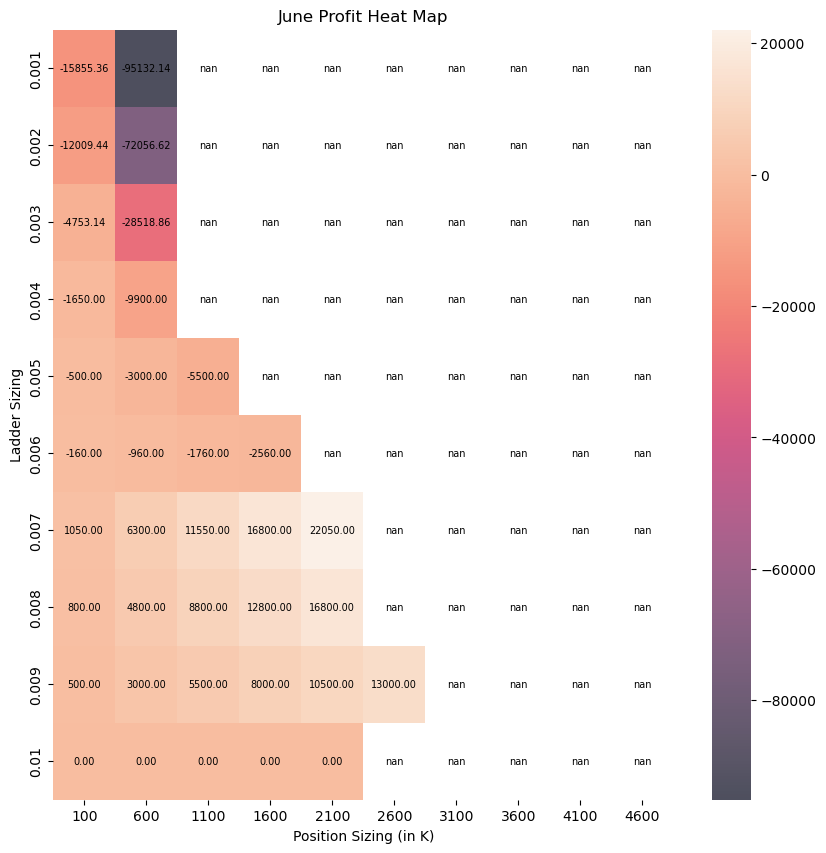


Processing July
Optimal G: 0.002
Optimal n: 2100000
Optimal net profit: 180600.0001
Computing time:3.687732219696045
maximum loss: 0
min unrealized PNL: -17733.3333
maximum position: 9878400.0
Realized profit: 180600.0001



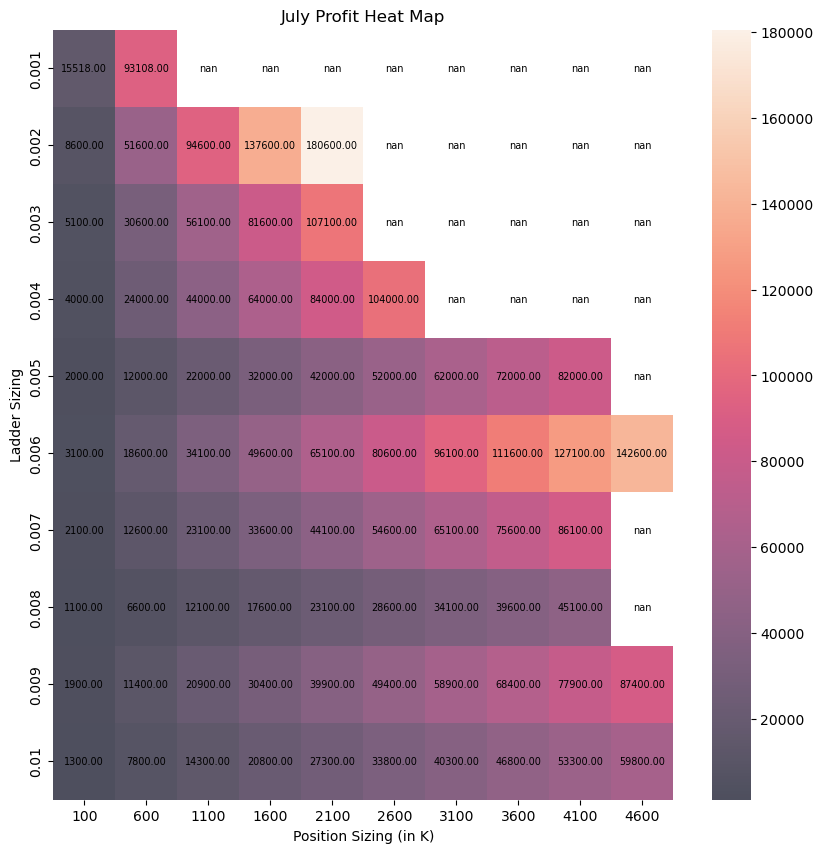


Processing August
Optimal G: 0.010000000000000002
Optimal n: 4600000
Optimal net profit: 92000.0
Computing time:2.4080772399902344
maximum loss: 0
min unrealized PNL: 0
maximum position: 5474000.0
Realized profit: 92000.0



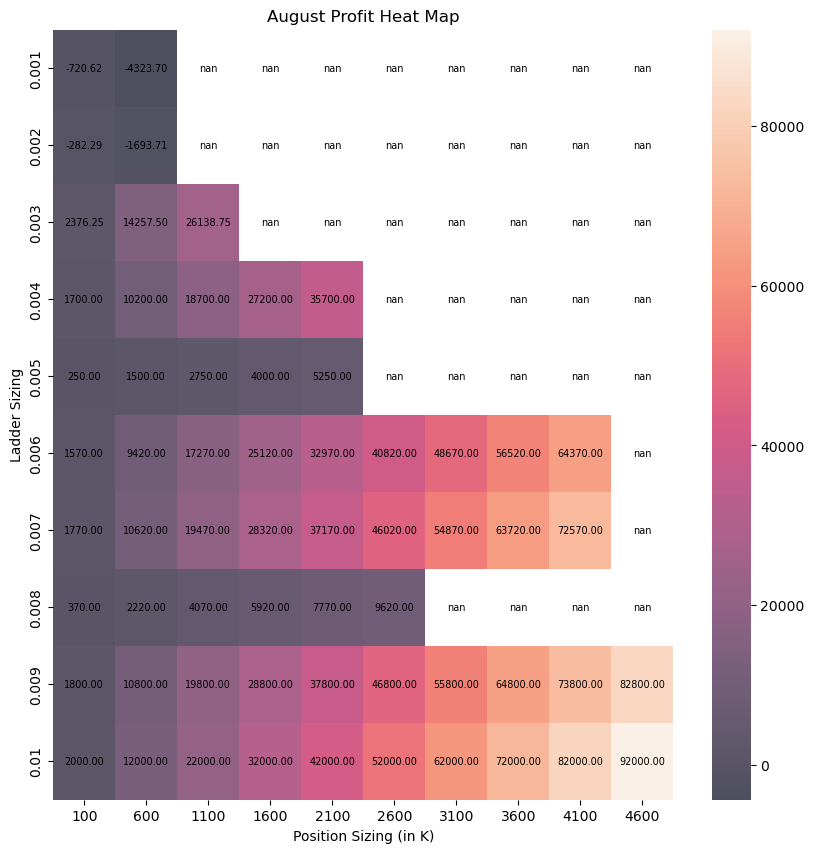


Processing September
Optimal G: 0.007
Optimal n: 2600000
Optimal net profit: 36400.0
Computing time:2.9418535232543945
maximum loss: -18200.0
min unrealized PNL: -27560.0
maximum position: 9049560.0
Realized profit: 36400.0



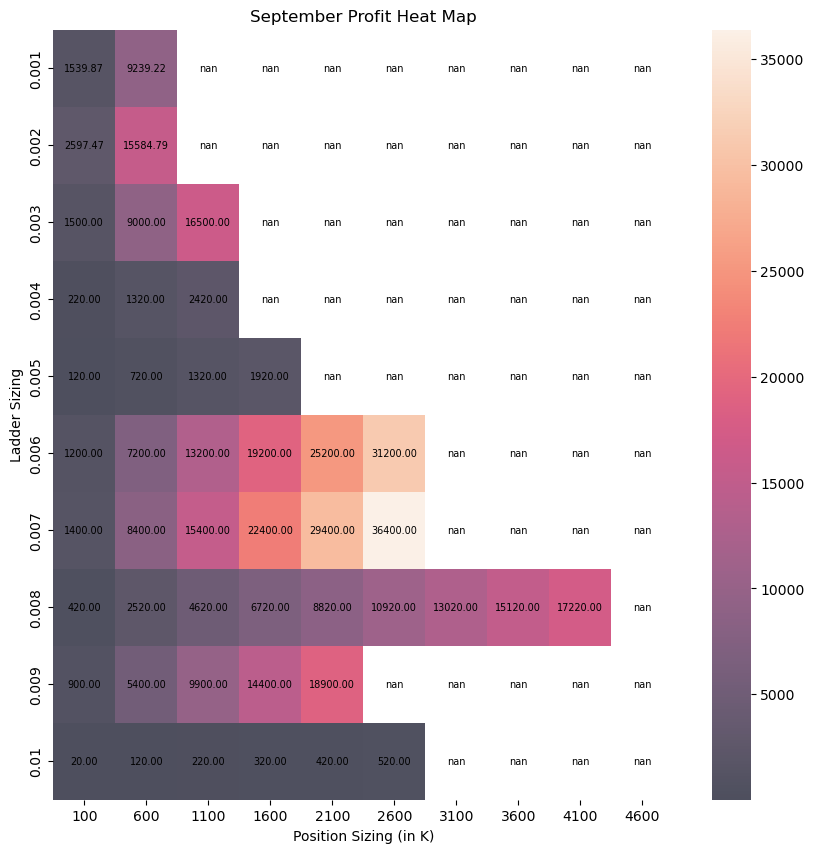


Processing October
Optimal G: 0.007
Optimal n: 4600000
Optimal net profit: 100280.0
Computing time:3.060939073562622
maximum loss: 0
min unrealized PNL: 0
maximum position: 5377400.0
Realized profit: 100280.0



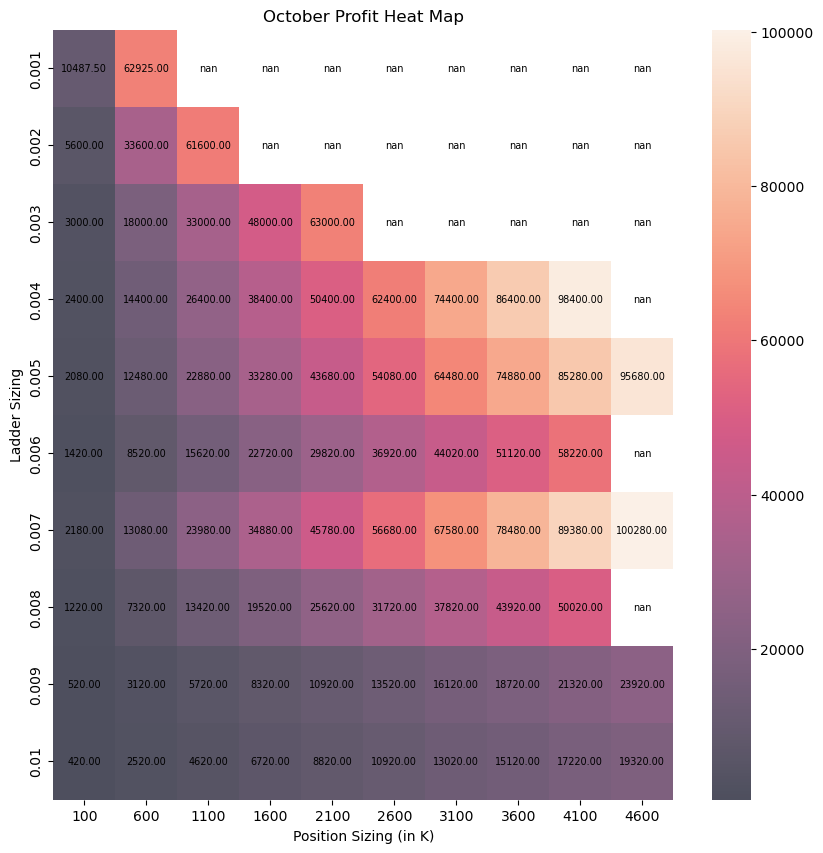


Processing November
Optimal G: 0.010000000000000002
Optimal n: 2600000
Optimal net profit: 26000.0
Computing time:4.138820648193359
maximum loss: -52000.0
min unrealized PNL: -78000.0
maximum position: 8808540.0
Realized profit: 26000.0



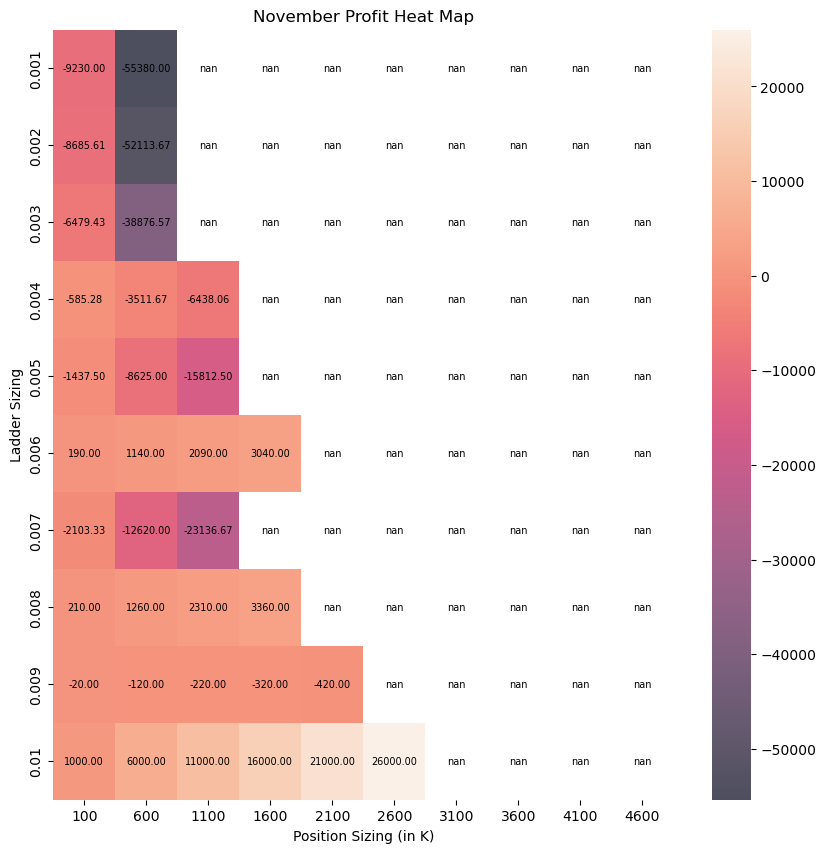


Processing December
Optimal G: 0.003
Optimal n: 4100000
Optimal net profit: 270600.0
Computing time:4.161980867385864
maximum loss: 0
min unrealized PNL: -12300.0
maximum position: 9225000.0
Realized profit: 270600.0



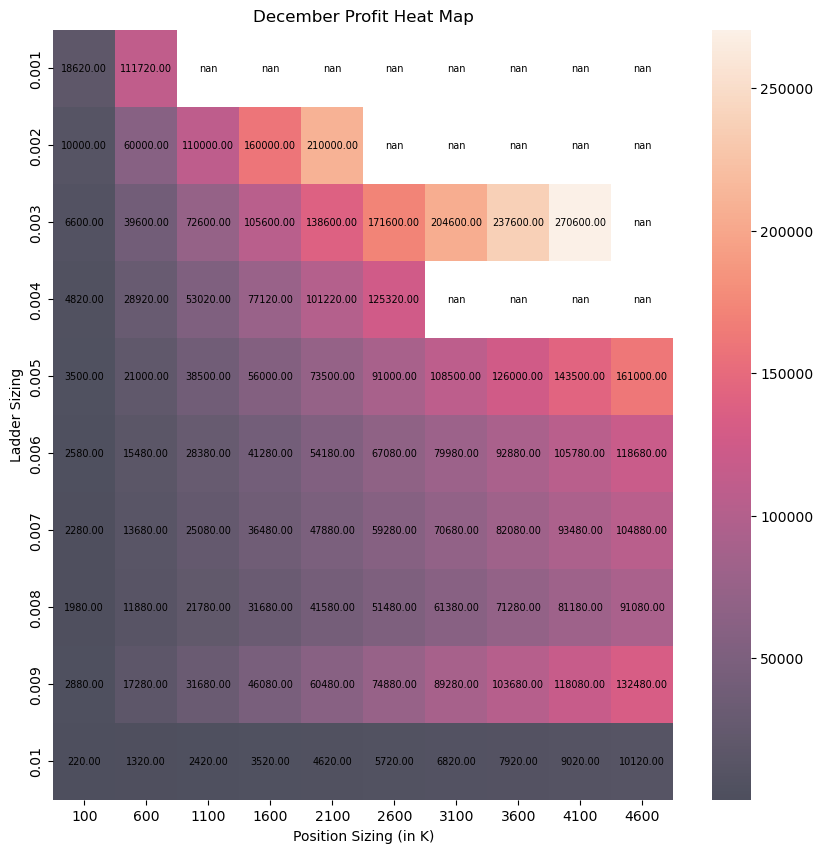

In [20]:
# Perform Grid Search Optimization and Plot Heat Map for each Month
for month_name, month_data in months_data.items():
    print(f"\nProcessing {month_name}")
    time1 = time.time()
    result = optimize_gridsearch(month_data)
    time2 = time.time()
    if result["best_G"] is not None:
        print(f"Optimal G: {result['best_G']}")
        print(f"Optimal n: {result['best_n']}")
        print(f"Optimal net profit: {result['best_profit']}")
        print(f"Computing time:{time2-time1}")
        maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(month_data,result['best_G'],result['best_n'])
        print(f"maximum loss: {maximum_loss}")
        print(f"min unrealized PNL: {min_unrealized_PNL}")
        print(f"maximum position: {max_pos}")
        print(f"Realized profit: {realized_pnl}\n")
        title = f"{month_name} Profit"
        profit_heat_map_for_gridsearch(result['R_PNL_matrix'], result['G_values'], result['n_values'], title)
        #_,_,_,_,_ = run_strategy_eval(data, result['best_G'],result['best_n'], trade_plot=True)
    else:
        print("No feasible solution found for", month_name)

Optimal G: 0.001
Optimal n: 600000
Optimal net profit: 11684.9996
Computing time:48.49166822433472
maximum loss: -160800.0
min unrealized PNL: -63569.5281
maximum position: 7404000.0
Realized profit: 11684.9996



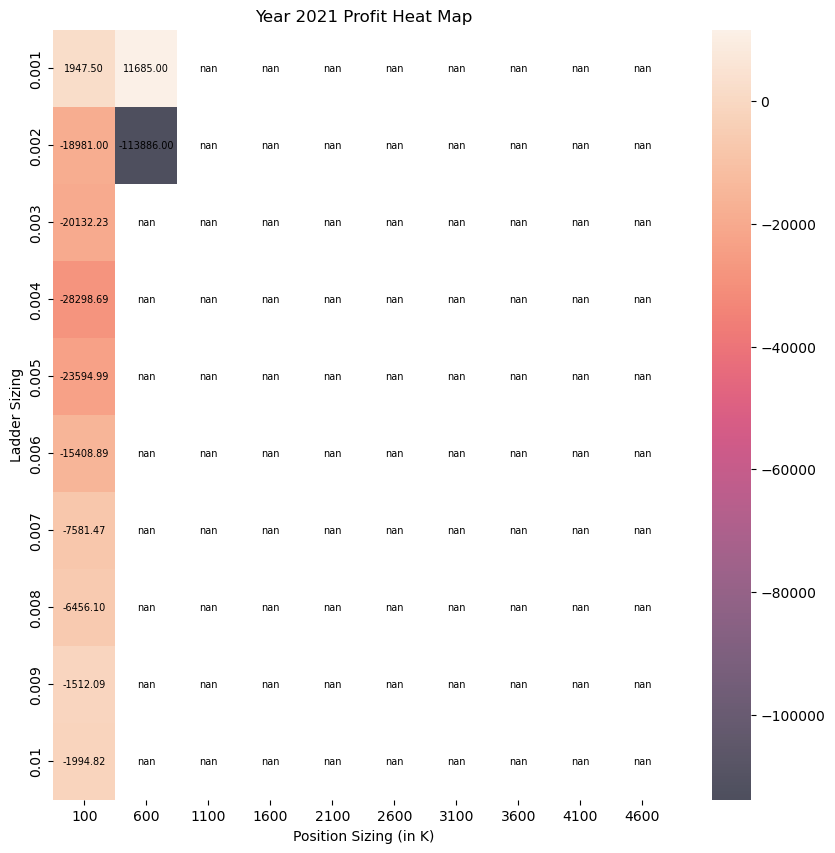

In [26]:
#year 2021
time1 = time.time()
result = optimize_gridsearch(Year_data)
time2 = time.time()
if result["best_G"] is not None:
        print(f"Optimal G: {result['best_G']}")
        print(f"Optimal n: {result['best_n']}")
        print(f"Optimal net profit: {result['best_profit']}")
        print(f"Computing time:{time2-time1}")
        maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(Year_data,result['best_G'],result['best_n'])
        print(f"maximum loss: {maximum_loss}")
        print(f"min unrealized PNL: {min_unrealized_PNL}")
        print(f"maximum position: {max_pos}")
        print(f"Realized profit: {realized_pnl}\n")
        title = f"Year 2021 Profit"
        profit_heat_map_for_gridsearch(result['R_PNL_matrix'], result['G_values'], result['n_values'], title)
else:
        print("No feasible solution found")

## with more frequency n size

In [12]:
def profit_heat_map_for_gridsearch(profits, ladder_sizing, position_sizing, title):
    plt.figure(figsize=(10,10))
    
    position_sizing_in_K = [int(val) for val in np.array(position_sizing) / 1000]

    ax = sns.heatmap(profits, cbar=True, alpha=0.7)
    
    for i in range(len(ladder_sizing)):
        for j in range(len(position_sizing)):
            ax.text(j+0.5, i+0.5, f"{profits[i, j]:.2f}", 
                    ha='center', va='center', color='black', fontsize=7)
    
    plt.xticks(np.arange(len(position_sizing)) + 0.5, position_sizing_in_K)
    
    rounded_labels = [round(val, 3) for val in ladder_sizing]  # Rounding to 3 decimal places
    plt.yticks(np.arange(len(ladder_sizing)) + 0.5, rounded_labels)
    
    plt.xlabel('Position Sizing (in K)')
    plt.ylabel('Ladder Sizing')
    plt.title(title + ' Heat Map')
    plt.show()

In [6]:
def profit_heat_map_for_gridsearch(profits, ladder_sizing, position_sizing, title):
    plt.figure(figsize=(50,10))  # Increase figure size for better readability
    
    position_sizing_in_K = [int(val) for val in np.array(position_sizing) / 1000]
    
    ax = sns.heatmap(profits, cmap=True, alpha = 0.7)  

    for i in range(len(ladder_sizing)):
        for j in range(len(position_sizing)):
            value = profits[i, j]
            #if abs(value) > threshold:  # Only annotate significant values
            ax.text(j+0.5, i+0.5, f"{value:.2f}", 
                        ha='center', va='center', color='white', fontsize=5, fontweight='bold')  # Adjust font size, color, and weight
    
    plt.xticks(np.arange(len(position_sizing)) + 0.5, position_sizing_in_K, fontsize=10)  # Adjust tick label size
    rounded_labels = [round(val, 3) for val in ladder_sizing]  # Rounding to 3 decimal places
    plt.yticks(np.arange(len(ladder_sizing)) + 0.5, rounded_labels, fontsize=5)  # Adjust tick label size
    
    plt.xlabel('Position Sizing (in K)', fontsize=5)  # Adjust font size
    plt.ylabel('Ladder Sizing', fontsize=5)  # Adjust font size
    plt.title(title + ' Heat Map', fontsize=14, fontweight='bold')  # Adjust font size and weight
    
    plt.show()

def optimize_gridsearch(tick_data):
    # For G: Values between 0.001 and 0.01 with an interval of 0.001
    G_values = np.arange(0.001, 0.011, 0.001)
    
    # For n: Values from 100000 to 5000000 with an interval of 500000
    n_values = np.arange(100000, 5000001, 100000)
    
    # Initialize a matrix for storing R_PNL values
    R_PNL_matrix = np.zeros((len(G_values), len(n_values)))
    
    best_profit = float('-inf')
    best_G = None
    best_n = None
    
    # Grid Search
    for i, G in enumerate(G_values):
        for j, n in enumerate(n_values):
            max_loss, U_PNL, max_position, R_PNL = run_strategy_optimised(tick_data, G, n)
            
            constraint1_okay = (max_position <= 10e6)
            constraint2_okay = (U_PNL >= -150e3)
            constraint3_okay = (max_loss >= -500e3)

            if constraint1_okay and constraint2_okay and constraint3_okay:
                R_PNL_matrix[i, j] = R_PNL
                if R_PNL > best_profit:
                    best_profit = R_PNL
                    best_G = G
                    best_n = n
            else:
                R_PNL_matrix[i, j] = np.nan
    result = {
        "best_G": best_G,
        "best_n": best_n,
        "best_profit": best_profit,
        "R_PNL_matrix": R_PNL_matrix,
        "G_values": G_values,
        "n_values": n_values  
    }  
    return result

In [7]:
time1 = time.time()
result = optimize_gridsearch(Year_data)
time2 = time.time()
if result["best_G"] is not None:
        print(f"Optimal G: {result['best_G']}")
        print(f"Optimal n: {result['best_n']}")
        print(f"Optimal net profit: {result['best_profit']}")
        print(f"Computing time:{time2-time1}")
        maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(Year_data,result['best_G'],result['best_n'])
        print(f"maximum loss: {maximum_loss}")
        print(f"min unrealized PNL: {min_unrealized_PNL}")
        print(f"maximum position: {max_pos}")
        print(f"Realized profit: {realized_pnl}\n")
        profit_heat_map_for_gridsearch(result['R_PNL_matrix'], result['G_values'], result['n_values'],title)
        #_,_,_,_,_ = run_strategy_eval(data, result['best_G'],result['best_n'], trade_plot=True)
else:
        print("No feasible solution found")

Optimal G: 0.001
Optimal n: 800000
Optimal net profit: 15580.0016
Computing time:204.61287760734558
maximum loss: -214400.0
min unrealized PNL: -84759.3708
maximum position: 9872000.0
Realized profit: 15580.0016



TypeError: profit_heat_map_for_gridsearch() missing 1 required positional argument: 'title'

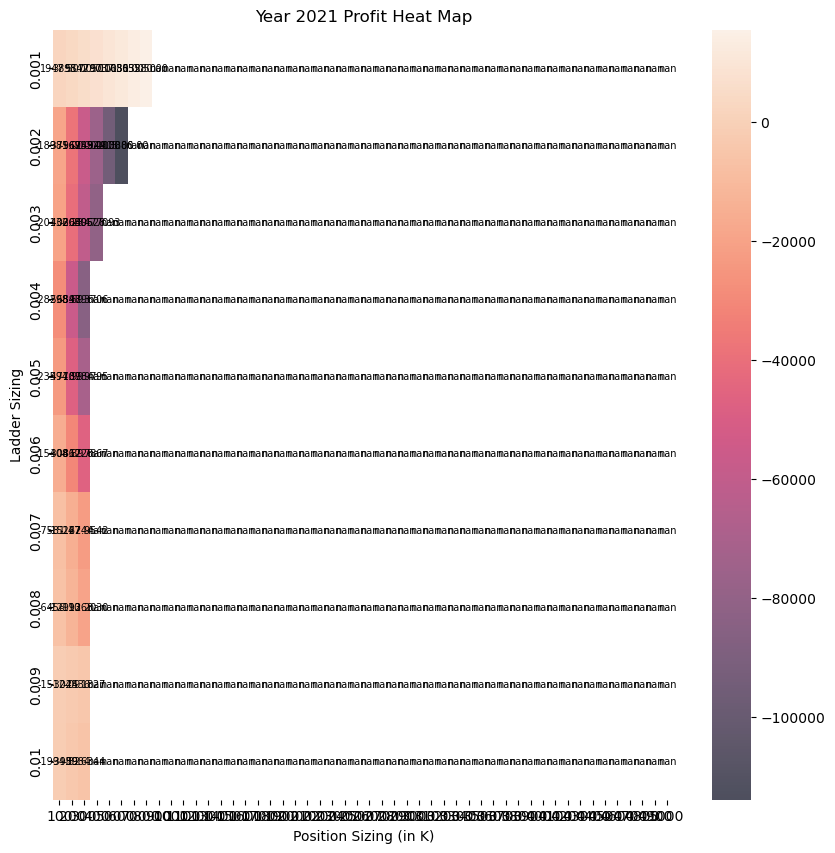

In [13]:
title = f"Year 2021 Profit"    
profit_heat_map_for_gridsearch(result['R_PNL_matrix'], result['G_values'], result['n_values'], title)


In [ ]:
# Perform Grid Search Optimization and Plot Heat Map for each Month
for month_name, month_data in months_data.items():
    print(f"\nProcessing {month_name}")
    time1 = time.time()
    result = optimize_gridsearch(month_data)
    time2 = time.time()
    if result["best_G"] is not None:
        print(f"Optimal G: {result['best_G']}")
        print(f"Optimal n: {result['best_n']}")
        print(f"Optimal net profit: {result['best_profit']}")
        print(f"Computing time:{time2-time1}")
        maximum_loss, min_unrealized_PNL, max_pos, realized_pnl=run_strategy_optimised(month_data,result['best_G'],result['best_n'])
        print(f"maximum loss: {maximum_loss}")
        print(f"min unrealized PNL: {min_unrealized_PNL}")
        print(f"maximum position: {max_pos}")
        print(f"Realized profit: {realized_pnl}\n")
        title = f"{month_name} Profit"
        #profit_heat_map_for_gridsearch(result['R_PNL_matrix'], result['G_values'], result['n_values'], title)
        #_,_,_,_,_ = run_strategy_eval(data, result['best_G'],result['best_n'], trade_plot=True)
    else:
        print("No feasible solution found for", month_name)